# Global Warming Project Introduction
A Brief Data Analysis for the Cause and Effects of Global Warming

The goal of this project is to visualize "Global Warming", discuss the relationship between causes and effects using a statistical approach, and predict future change of the global temperature index. We first will use the python library matplotlib to visualize the change of our world average temperature, sea level, and co2 emission, and then compare them in the same graph. Later, we will discuss the correlation between the variables using some statistical technic, and then furtherly visualize them. Finally, we will use a statistical model or machine learning model to predict the change in temperature index.

# Dependencies and Setup

Run the following cells to set up the notebook.

Import neccessary dependencies

In [ ]:
%matplotlib inline
import datetime
import itertools
import pandas as pd

import numpy as np
import matplotlib.pylab
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 16
plt.style.use('fivethirtyeight')
import warnings
import itertools
warnings.filterwarnings("ignore") # specify to ignore warning messages


import seaborn as sns
from statsmodels.tsa.stattools import coint, adfuller
from google.colab import drive
drive.mount('/content/drive/')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Data Wrangling and Cleaning
In this section, we will import four datasets: sea level, co2, global temperature, and country temperature. Then, we will do some data wrangling and cleaning which includes dropping rows with NAs, formatting, etc. 

Import the three data sets from the shared drive

In [ ]:
# get the sea level data
sea_level_df = pd.read_csv('/content/drive/Shareddrives/CIS545 - Global Warming/Datasets/sea_levels.csv')

In [ ]:
# get the co2 data
parser = lambda x: pd.to_datetime(x, format='%Y%m', errors = 'coerce')
co2_df = pd.read_csv("/content/drive/Shareddrives/CIS545 - Global Warming/Datasets/CO2.csv", parse_dates=['YYYYMM'], date_parser=parser) 

In [ ]:
# get the country temperature data
country_temperature_df = pd.read_csv("/content/drive/Shareddrives/CIS545 - Global Warming/Datasets/GlobalLandTemperaturesByCountry.csv")

In [ ]:
# get the global temperature data
temperature_df = pd.read_csv("/content/drive/Shareddrives/CIS545 - Global Warming/Datasets/GlobalTemperatures.csv")

## Sea Level Data Wrangling
In this subsection, we will do some basic cleaning of the sea level data

In [ ]:
sea_level_df.shape

(1608, 3)

In [ ]:
sea_level_df.dtypes

Time                 object
GMSL                float64
GMSL uncertainty    float64
dtype: object

Let's see the columns and values of the sea level data

In [ ]:
# check the df
sea_level_df

Time   GMSL  GMSL uncertainty
0     1880-01-15 -183.0              24.2
1     1880-02-15 -171.1              24.2
2     1880-03-15 -164.3              24.2
3     1880-04-15 -158.2              24.2
4     1880-05-15 -158.7              24.2
...          ...    ...               ...
1603  2013-08-15   71.6               8.8
1604  2013-09-15   68.8               8.8
1605  2013-10-15   66.4               8.9
1606  2013-11-15   59.7               9.0
1607  2013-12-15   58.5               9.0

[1608 rows x 3 columns]

Convert the time column to a datetime data type.

In [ ]:
# formatting the date column correctly
sea_level_df.Time=sea_level_df.Time.apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d'))
# check
print(sea_level_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1608 entries, 0 to 1607
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Time              1608 non-null   datetime64[ns]
 1   GMSL              1608 non-null   float64       
 2   GMSL uncertainty  1608 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 37.8 KB
None


Extract the year, month, and day from the `sea_level_df` to be stored as columns called "Year", "Month", and "Day" in the `sea_level_df`



In [ ]:
sea_level_df['Year'] = sea_level_df['Time'].apply(lambda x: x.year)
sea_level_df['Month'] = sea_level_df['Time'].apply(lambda x: x.month)
sea_level_df['Day'] = sea_level_df['Time'].apply(lambda x: x.day)

In [ ]:
sea_level_df

Time   GMSL  GMSL uncertainty  Year  Month  Day
0    1880-01-15 -183.0              24.2  1880      1   15
1    1880-02-15 -171.1              24.2  1880      2   15
2    1880-03-15 -164.3              24.2  1880      3   15
3    1880-04-15 -158.2              24.2  1880      4   15
4    1880-05-15 -158.7              24.2  1880      5   15
...         ...    ...               ...   ...    ...  ...
1603 2013-08-15   71.6               8.8  2013      8   15
1604 2013-09-15   68.8               8.8  2013      9   15
1605 2013-10-15   66.4               8.9  2013     10   15
1606 2013-11-15   59.7               9.0  2013     11   15
1607 2013-12-15   58.5               9.0  2013     12   15

[1608 rows x 6 columns]

## CO2 Data Wrangling
In this subsection, we will do some basic cleaning of the CO2 data

In [ ]:
co2_df.shape

(5094, 6)

In [ ]:
co2_df.dtypes

MSN                     object
YYYYMM          datetime64[ns]
Value                   object
Column_Order             int64
Description             object
Unit                    object
dtype: object

Let's see the columns and values of the co2 level data

In [ ]:
# check the df
co2_df

MSN     YYYYMM    Value  Column_Order  \
0     CLEIEUS 1973-01-01   72.076             1   
1     CLEIEUS 1973-02-01   64.442             1   
2     CLEIEUS 1973-03-01   64.084             1   
3     CLEIEUS 1973-04-01   60.842             1   
4     CLEIEUS 1973-05-01   61.798             1   
...       ...        ...      ...           ...   
5089  TXEIEUS 2016-03-01  115.997             9   
5090  TXEIEUS 2016-04-01  113.815             9   
5091  TXEIEUS 2016-05-01   129.44             9   
5092  TXEIEUS 2016-06-01  172.074             9   
5093  TXEIEUS 2016-07-01  201.958             9   

                                           Description  \
0             Coal Electric Power Sector CO2 Emissions   
1             Coal Electric Power Sector CO2 Emissions   
2             Coal Electric Power Sector CO2 Emissions   
3             Coal Electric Power Sector CO2 Emissions   
4             Coal Electric Power Sector CO2 Emissions   
...                                                ...   
5089  Total Energy Electric Power Sector CO2 Emissions   
5090  Total Energy Electric Power Sector CO2 Emissions   
5091  Total Energy Electric Power Sector CO2 Emissions   
5092  Total Energy Electric Power Sector CO2 Emissions   
5093  Total Energy Electric Power Sector CO2 Emissions   

                                       Unit  
0     Million Metric Tons of Carbon Dioxide  
1     Million Metric Tons of Carbon Dioxide  
2     Million Metric Tons of Carbon Dioxide  
3     Million Metric Tons of Carbon Dioxide  
4     Million Metric Tons of Carbon Dioxide  
...                                     ...  
5089  Million Metric Tons of Carbon Dioxide  
5090  Million Metric Tons of Carbon Dioxide  
5091  Million Metric Tons of Carbon Dioxide  
5092  Million Metric Tons of Carbon Dioxide  
5093  Million Metric Tons of Carbon Dioxide  

[5094 rows x 6 columns]

Extract the year, month, and day from the `co2_df` to be stored as columns called "Year", "Month", and "Day" in the `co2_df`

In [ ]:
co2_df = co2_df.dropna(subset=['YYYYMM'])

In [ ]:
co2_df['Year'] = co2_df['YYYYMM'].apply(lambda x: x.year)
co2_df['Month'] = co2_df['YYYYMM'].apply(lambda x: x.month)
co2_df['Day'] = co2_df['YYYYMM'].apply(lambda x: x.day)

In [ ]:
co2_df

MSN     YYYYMM    Value  Column_Order  \
0     CLEIEUS 1973-01-01   72.076             1   
1     CLEIEUS 1973-02-01   64.442             1   
2     CLEIEUS 1973-03-01   64.084             1   
3     CLEIEUS 1973-04-01   60.842             1   
4     CLEIEUS 1973-05-01   61.798             1   
...       ...        ...      ...           ...   
5089  TXEIEUS 2016-03-01  115.997             9   
5090  TXEIEUS 2016-04-01  113.815             9   
5091  TXEIEUS 2016-05-01   129.44             9   
5092  TXEIEUS 2016-06-01  172.074             9   
5093  TXEIEUS 2016-07-01  201.958             9   

                                           Description  \
0             Coal Electric Power Sector CO2 Emissions   
1             Coal Electric Power Sector CO2 Emissions   
2             Coal Electric Power Sector CO2 Emissions   
3             Coal Electric Power Sector CO2 Emissions   
4             Coal Electric Power Sector CO2 Emissions   
...                                                ...   
5089  Total Energy Electric Power Sector CO2 Emissions   
5090  Total Energy Electric Power Sector CO2 Emissions   
5091  Total Energy Electric Power Sector CO2 Emissions   
5092  Total Energy Electric Power Sector CO2 Emissions   
5093  Total Energy Electric Power Sector CO2 Emissions   

                                       Unit  Year  Month  Day  
0     Million Metric Tons of Carbon Dioxide  1973      1    1  
1     Million Metric Tons of Carbon Dioxide  1973      2    1  
2     Million Metric Tons of Carbon Dioxide  1973      3    1  
3     Million Metric Tons of Carbon Dioxide  1973      4    1  
4     Million Metric Tons of Carbon Dioxide  1973      5    1  
...                                     ...   ...    ...  ...  
5089  Million Metric Tons of Carbon Dioxide  2016      3    1  
5090  Million Metric Tons of Carbon Dioxide  2016      4    1  
5091  Million Metric Tons of Carbon Dioxide  2016      5    1  
5092  Million Metric Tons of Carbon Dioxide  2016      6    1  
5093  Million Metric Tons of Carbon Dioxide  2016      7    1  

[4707 rows x 9 columns]

Data Retrieving
Dataset available in .csv called CO2 already
Need to change the time format first

Make the time series for the co2 dataframe and drop rows where the index is null. Turn values numeric

In [ ]:
co2_ts = co2_df[pd.Series(pd.to_datetime(co2_df.index, errors='coerce')).notnull().values]
co2_ts['Value'] = pd.to_numeric(co2_ts['Value'] , errors='coerce')
co2_ts.dropna(inplace = True)

In [ ]:
co2_ts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4323 entries, 0 to 5093
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   MSN           4323 non-null   object        
 1   YYYYMM        4323 non-null   datetime64[ns]
 2   Value         4323 non-null   float64       
 3   Column_Order  4323 non-null   int64         
 4   Description   4323 non-null   object        
 5   Unit          4323 non-null   object        
 6   Year          4323 non-null   int64         
 7   Month         4323 non-null   int64         
 8   Day           4323 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 337.7+ KB


In [ ]:
co2_ts.head(5)

MSN     YYYYMM   Value  Column_Order  \
0  CLEIEUS 1973-01-01  72.076             1   
1  CLEIEUS 1973-02-01  64.442             1   
2  CLEIEUS 1973-03-01  64.084             1   
3  CLEIEUS 1973-04-01  60.842             1   
4  CLEIEUS 1973-05-01  61.798             1   

                                Description  \
0  Coal Electric Power Sector CO2 Emissions   
1  Coal Electric Power Sector CO2 Emissions   
2  Coal Electric Power Sector CO2 Emissions   
3  Coal Electric Power Sector CO2 Emissions   
4  Coal Electric Power Sector CO2 Emissions   

                                    Unit  Year  Month  Day  
0  Million Metric Tons of Carbon Dioxide  1973      1    1  
1  Million Metric Tons of Carbon Dioxide  1973      2    1  
2  Million Metric Tons of Carbon Dioxide  1973      3    1  
3  Million Metric Tons of Carbon Dioxide  1973      4    1  
4  Million Metric Tons of Carbon Dioxide  1973      5    1

By inspecting the data, we know that there are 8 sources of co2 emission. We want to analyze all of them seperately

In [ ]:
Energy_sources = co2_ts.groupby('Description')

In [ ]:
Energy_sources.head(1)

MSN     YYYYMM    Value  Column_Order  \
0     CLEIEUS 1973-01-01   72.076             1   
566   NNEIEUS 1973-01-01   12.175             2   
1132  DKEIEUS 1973-01-01    2.375             3   
1698  PCEIEUS 1973-01-01    0.128             4   
2264  RFEIEUS 1973-01-01   24.867             5   
2830  PAEIEUS 1973-01-01   27.369             6   
3604  GEEIEUS 1989-01-01    0.031             7   
4170  NWEIEUS 1989-01-01    0.371             8   
4528  TXEIEUS 1973-01-01  111.621             9   

                                            Description  \
0              Coal Electric Power Sector CO2 Emissions   
566     Natural Gas Electric Power Sector CO2 Emissions   
1132  Distillate Fuel, Including Kerosene-Type Jet F...   
1698  Petroleum Coke Electric Power Sector CO2 Emiss...   
2264  Residual Fuel Oil Electric Power Sector CO2 Em...   
2830      Petroleum Electric Power Sector CO2 Emissions   
3604  Geothermal Energy Electric Power Sector CO2 Em...   
4170  Non-Biomass Waste Electric Power Sector CO2 Em...   
4528   Total Energy Electric Power Sector CO2 Emissions   

                                       Unit  Year  Month  Day  
0     Million Metric Tons of Carbon Dioxide  1973      1    1  
566   Million Metric Tons of Carbon Dioxide  1973      1    1  
1132  Million Metric Tons of Carbon Dioxide  1973      1    1  
1698  Million Metric Tons of Carbon Dioxide  1973      1    1  
2264  Million Metric Tons of Carbon Dioxide  1973      1    1  
2830  Million Metric Tons of Carbon Dioxide  1973      1    1  
3604  Million Metric Tons of Carbon Dioxide  1989      1    1  
4170  Million Metric Tons of Carbon Dioxide  1989      1    1  
4528  Million Metric Tons of Carbon Dioxide  1973      1    1

## Temperature Data Wrangling
In this subsection, we will do some basic cleaning of the both temperature datasets

Let's data wrangle the country temperature data set

In [ ]:
country_temperature_df.shape

(577462, 4)

In [ ]:
country_temperature_df.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
Country                           object
dtype: object

Let's see the columns and values of the temperature level data

In [ ]:
# check the df
country_temperature_df

dt  AverageTemperature  AverageTemperatureUncertainty  \
0       1743-11-01               4.384                          2.294   
1       1743-12-01                 NaN                            NaN   
2       1744-01-01                 NaN                            NaN   
3       1744-02-01                 NaN                            NaN   
4       1744-03-01                 NaN                            NaN   
...            ...                 ...                            ...   
577457  2013-05-01              19.059                          1.022   
577458  2013-06-01              17.613                          0.473   
577459  2013-07-01              17.000                          0.453   
577460  2013-08-01              19.759                          0.717   
577461  2013-09-01                 NaN                            NaN   

         Country  
0          Åland  
1          Åland  
2          Åland  
3          Åland  
4          Åland  
...          ...  
577457  Zimbabwe  
577458  Zimbabwe  
577459  Zimbabwe  
577460  Zimbabwe  
577461  Zimbabwe  

[577462 rows x 4 columns]

Convert the dt column to a datetime data type

In [ ]:
# formatting the date column correctly
country_temperature_df.dt=country_temperature_df.dt.apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d'))
# check
print(country_temperature_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   dt                             577462 non-null  datetime64[ns]
 1   AverageTemperature             544811 non-null  float64       
 2   AverageTemperatureUncertainty  545550 non-null  float64       
 3   Country                        577462 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 17.6+ MB
None


Drop rows with NaN in the columns of AverageTemperature and AverageTemperatureUncertainty

In [ ]:
country_temperature_df = country_temperature_df.dropna(subset=['AverageTemperature', 'AverageTemperatureUncertainty'])
country_temperature_df.head(5)

dt  AverageTemperature  AverageTemperatureUncertainty Country
0 1743-11-01               4.384                          2.294   Åland
5 1744-04-01               1.530                          4.680   Åland
6 1744-05-01               6.702                          1.789   Åland
7 1744-06-01              11.609                          1.577   Åland
8 1744-07-01              15.342                          1.410   Åland

Extract the year, month, and day from the `temperature_df` to be stored as columns called "Year", "Month", and "Day" in the `temperature_df`

In [ ]:
country_temperature_df['Year'] = country_temperature_df['dt'].apply(lambda x: x.year)
country_temperature_df['Month'] = country_temperature_df['dt'].apply(lambda x: x.month)
country_temperature_df['Day'] = country_temperature_df['dt'].apply(lambda x: x.day)

In [ ]:
country_temperature_df

dt  AverageTemperature  AverageTemperatureUncertainty  \
0      1743-11-01               4.384                          2.294   
5      1744-04-01               1.530                          4.680   
6      1744-05-01               6.702                          1.789   
7      1744-06-01              11.609                          1.577   
8      1744-07-01              15.342                          1.410   
...           ...                 ...                            ...   
577456 2013-04-01              21.142                          0.495   
577457 2013-05-01              19.059                          1.022   
577458 2013-06-01              17.613                          0.473   
577459 2013-07-01              17.000                          0.453   
577460 2013-08-01              19.759                          0.717   

         Country  Year  Month  Day  
0          Åland  1743     11    1  
5          Åland  1744      4    1  
6          Åland  1744      5    1  
7          Åland  1744      6    1  
8          Åland  1744      7    1  
...          ...   ...    ...  ...  
577456  Zimbabwe  2013      4    1  
577457  Zimbabwe  2013      5    1  
577458  Zimbabwe  2013      6    1  
577459  Zimbabwe  2013      7    1  
577460  Zimbabwe  2013      8    1  

[544811 rows x 7 columns]

Now let's data wrangle the global temperature data set

In [ ]:
temperature_df.shape

(3192, 9)

In [ ]:
temperature_df.dtypes

dt                                            object
LandAverageTemperature                       float64
LandAverageTemperatureUncertainty            float64
LandMaxTemperature                           float64
LandMaxTemperatureUncertainty                float64
LandMinTemperature                           float64
LandMinTemperatureUncertainty                float64
LandAndOceanAverageTemperature               float64
LandAndOceanAverageTemperatureUncertainty    float64
dtype: object

Let's see the columns and values of the temperature level data

In [ ]:
# check the df
temperature_df

dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0     1750-01-01                   3.034                              3.574   
1     1750-02-01                   3.083                              3.702   
2     1750-03-01                   5.626                              3.076   
3     1750-04-01                   8.490                              2.451   
4     1750-05-01                  11.573                              2.072   
...          ...                     ...                                ...   
3187  2015-08-01                  14.755                              0.072   
3188  2015-09-01                  12.999                              0.079   
3189  2015-10-01                  10.801                              0.102   
3190  2015-11-01                   7.433                              0.119   
3191  2015-12-01                   5.518                              0.100   

      LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0                    NaN                            NaN                 NaN   
1                    NaN                            NaN                 NaN   
2                    NaN                            NaN                 NaN   
3                    NaN                            NaN                 NaN   
4                    NaN                            NaN                 NaN   
...                  ...                            ...                 ...   
3187              20.699                          0.110               9.005   
3188              18.845                          0.088               7.199   
3189              16.450                          0.059               5.232   
3190              12.892                          0.093               2.157   
3191              10.725                          0.154               0.287   

      LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                               NaN                             NaN   
1                               NaN                             NaN   
2                               NaN                             NaN   
3                               NaN                             NaN   
4                               NaN                             NaN   
...                             ...                             ...   
3187                          0.170                          17.589   
3188                          0.229                          17.049   
3189                          0.115                          16.290   
3190                          0.106                          15.252   
3191                          0.099                          14.774   

      LandAndOceanAverageTemperatureUncertainty  
0                                           NaN  
1                                           NaN  
2                                           NaN  
3                                           NaN  
4                                           NaN  
...                                         ...  
3187                                      0.057  
3188                                      0.058  
3189                                      0.062  
3190                                      0.063  
3191                                      0.062  

[3192 rows x 9 columns]

Convert the dt column to a datetime data type

In [ ]:
# formatting the date column correctly
temperature_df.dt=temperature_df.dt.apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d'))
# check
print(temperature_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   dt                                         3192 non-null   datetime64[ns]
 1   LandAverageTemperature                     3180 non-null   float64       
 2   LandAverageTemperatureUncertainty          3180 non-null   float64       
 3   LandMaxTemperature                         1992 non-null   float64       
 4   LandMaxTemperatureUncertainty              1992 non-null   float64       
 5   LandMinTemperature                         1992 non-null   float64       
 6   LandMinTemperatureUncertainty              1992 non-null   float64       
 7   LandAndOceanAverageTemperature             1992 non-null   float64       
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64       
dtypes: datetime64[ns](1)

Drop rows with NaN in the columns of LandMaxTemperature, LandMaxTemperatureUncertainty, LandMinTemperature, LandMinTemperatureUncertainty, LandAndOceanAverageTemperature,and LandAndOceanAverageTemperatureUncertainty

In [ ]:
temperature_df = temperature_df.dropna(subset=[
                                               'LandMaxTemperature', 
                                               'LandMaxTemperatureUncertainty', 
                                               'LandMinTemperature', 
                                               'LandMinTemperatureUncertainty', 
                                               'LandAndOceanAverageTemperature', 
                                               'LandAndOceanAverageTemperatureUncertainty'
                                               ])
temperature_df.head(5)

dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
1200 1850-01-01                   0.749                              1.105   
1201 1850-02-01                   3.071                              1.275   
1202 1850-03-01                   4.954                              0.955   
1203 1850-04-01                   7.217                              0.665   
1204 1850-05-01                  10.004                              0.617   

      LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
1200               8.242                          1.738              -3.206   
1201               9.970                          3.007              -2.291   
1202              10.347                          2.401              -1.905   
1203              12.934                          1.004               1.018   
1204              15.655                          2.406               3.811   

      LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
1200                          2.822                          12.833   
1201                          1.623                          13.588   
1202                          1.410                          14.043   
1203                          1.329                          14.667   
1204                          1.347                          15.507   

      LandAndOceanAverageTemperatureUncertainty  
1200                                      0.367  
1201                                      0.414  
1202                                      0.341  
1203                                      0.267  
1204                                      0.249

Extract the year, month, and day from the `temperature_df` to be stored as columns called "Year", "Month", and "Day" in the `temperature_df`

In [ ]:
temperature_df['Year'] = temperature_df['dt'].apply(lambda x: x.year)
temperature_df['Month'] = temperature_df['dt'].apply(lambda x: x.month)
temperature_df['Day'] = temperature_df['dt'].apply(lambda x: x.day)

In [ ]:
temperature_df

dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
1200 1850-01-01                   0.749                              1.105   
1201 1850-02-01                   3.071                              1.275   
1202 1850-03-01                   4.954                              0.955   
1203 1850-04-01                   7.217                              0.665   
1204 1850-05-01                  10.004                              0.617   
...         ...                     ...                                ...   
3187 2015-08-01                  14.755                              0.072   
3188 2015-09-01                  12.999                              0.079   
3189 2015-10-01                  10.801                              0.102   
3190 2015-11-01                   7.433                              0.119   
3191 2015-12-01                   5.518                              0.100   

      LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
1200               8.242                          1.738              -3.206   
1201               9.970                          3.007              -2.291   
1202              10.347                          2.401              -1.905   
1203              12.934                          1.004               1.018   
1204              15.655                          2.406               3.811   
...                  ...                            ...                 ...   
3187              20.699                          0.110               9.005   
3188              18.845                          0.088               7.199   
3189              16.450                          0.059               5.232   
3190              12.892                          0.093               2.157   
3191              10.725                          0.154               0.287   

      LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
1200                          2.822                          12.833   
1201                          1.623                          13.588   
1202                          1.410                          14.043   
1203                          1.329                          14.667   
1204                          1.347                          15.507   
...                             ...                             ...   
3187                          0.170                          17.589   
3188                          0.229                          17.049   
3189                          0.115                          16.290   
3190                          0.106                          15.252   
3191                          0.099                          14.774   

      LandAndOceanAverageTemperatureUncertainty  Year  Month  Day  
1200                                      0.367  1850      1    1  
1201                                      0.414  1850      2    1  
1202                                      0.341  1850      3    1  
1203                                      0.267  1850      4    1  
1204                                      0.249  1850      5    1  
...                                         ...   ...    ...  ...  
3187                                      0.057  2015      8    1  
3188                                      0.058  2015      9    1  
3189                                      0.062  2015     10    1  
3190                                      0.063  2015     11    1  
3191                                      0.062  2015     12    1  

[1992 rows x 12 columns]

# Data Analysis
In this section, we will do heavy analysis on the three datasets. This section will include some visualizations and computation on the dataset itselfs.

## Sea Level Analysis

### Visulization

Plot the raw data to build an impression of sea level.

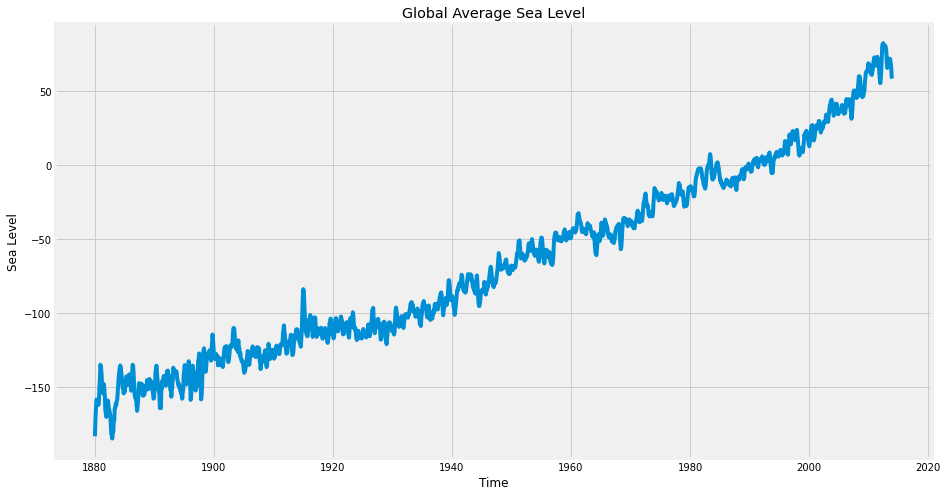

In [ ]:
plt.figure(figsize=(14,8))
plt.title('Global Average Sea Level')
plt.xlabel('Time')
plt.ylabel('Sea Level')
plt.plot(sea_level_df.Time,sea_level_df.GMSL)

Calculate the rolling mean and standard deviation in a one year period. We can find from the result that the average sea level has been rising while the standard deviation keeps a very low level, which indicates that the sea level rised stably.

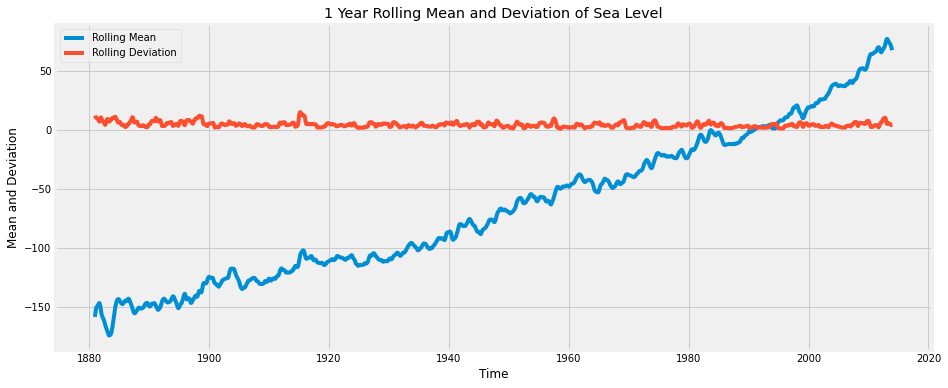

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(sea_level_df["Time"], sea_level_df["GMSL"].rolling(window=12,center=False).mean(),label='Rolling Mean')
plt.plot(sea_level_df["Time"], sea_level_df["GMSL"].rolling(window=12,center=False).std(),label='Rolling Deviation')
plt.xlabel("Time")
plt.ylabel("Mean and Deviation")
plt.title("1 Year Rolling Mean and Deviation of Sea Level")
plt.legend()

### Moving Average

In [ ]:
def PlotStationary(series):
    rolling_mean = series.rolling(window = 12, center = False).mean()
    rolling_std = series.rolling(window = 12, center = False).std()
    
    plt.plot(series, color = 'blue',label = 'Original Data')
    plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rolling_std, color ='black', label = 'Rolling Std')
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    
    plt.legend(loc='best', fontsize = 25)
    plt.title('Rolling Mean & Standard Deviation', fontsize = 25)

def AdfullerStationary(series, cutoff = 0.01):
    series_test = adfuller(series, autolag = 'AIC')
    series_test_output = pd.Series(series_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in series_test[4].items():
        series_test_output['Critical Value (%s)'%key] = value
    print(series_test_output)
    
    if series_test[1] <= cutoff:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

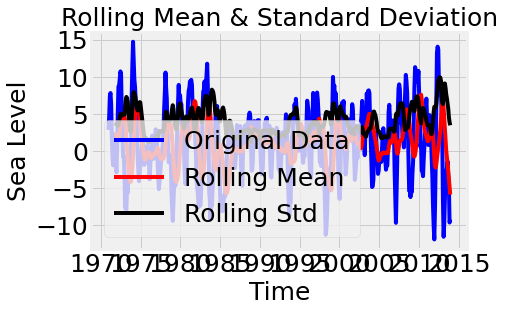

In [ ]:
sea_level_df_index = sea_level_df.set_index('Time')
sea_level_moving_avg_diff = sea_level_df_index["GMSL"]["1970":] - sea_level_df_index["GMSL"]["1970":].rolling(window=12,center=False).mean()
sea_level_moving_avg_diff.dropna(inplace=True)
PlotStationary(sea_level_moving_avg_diff)
plt.xlabel('Time', fontsize = 25)
plt.ylabel('Sea Level', fontsize = 25)
plt.show(block= True)

In [ ]:
AdfullerStationary(sea_level_moving_avg_diff)

Test Statistic                -7.868305e+00
p-value                        5.064461e-12
#Lags Used                     9.000000e+00
Number of Observations Used    5.070000e+02
Critical Value (1%)           -3.443314e+00
Critical Value (5%)           -2.867258e+00
Critical Value (10%)          -2.569815e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


### Exponentail moving average

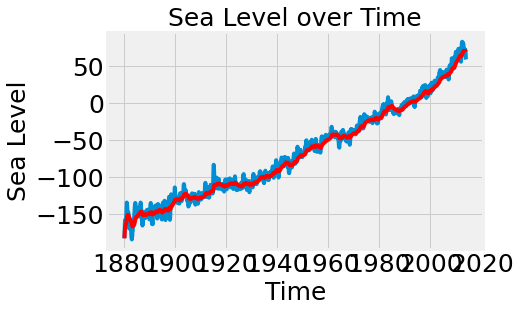

In [ ]:
sea_level_df_wighted_avg = sea_level_df_index["GMSL"].ewm(halflife=12).mean()
plt.plot(sea_level_df_index["GMSL"])
plt.plot(sea_level_df_wighted_avg, color='red')
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel('Time', fontsize = 25)
plt.ylabel('Sea Level', fontsize = 25)
plt.title('Sea Level over Time', fontsize = 25)
plt.show()

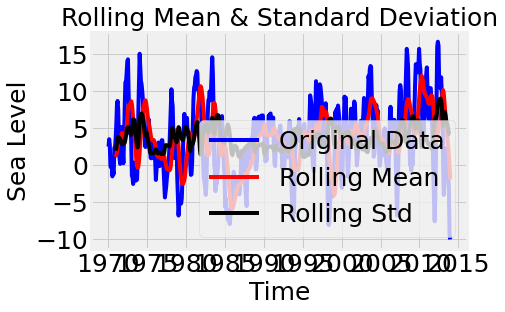

In [ ]:
sea_level_ewm_half_diff = sea_level_df_index["GMSL"]["1970":] - sea_level_df_wighted_avg["1970":]
PlotStationary(sea_level_ewm_half_diff)
plt.xlabel('Time', fontsize = 25)
plt.ylabel('Sea Level', fontsize = 25)
plt.show(block= True)

In [ ]:
AdfullerStationary(sea_level_ewm_half_diff)

Test Statistic                  -4.646559
p-value                          0.000106
#Lags Used                      10.000000
Number of Observations Used    517.000000
Critical Value (1%)             -3.443062
Critical Value (5%)             -2.867147
Critical Value (10%)            -2.569756
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


### Decomposing

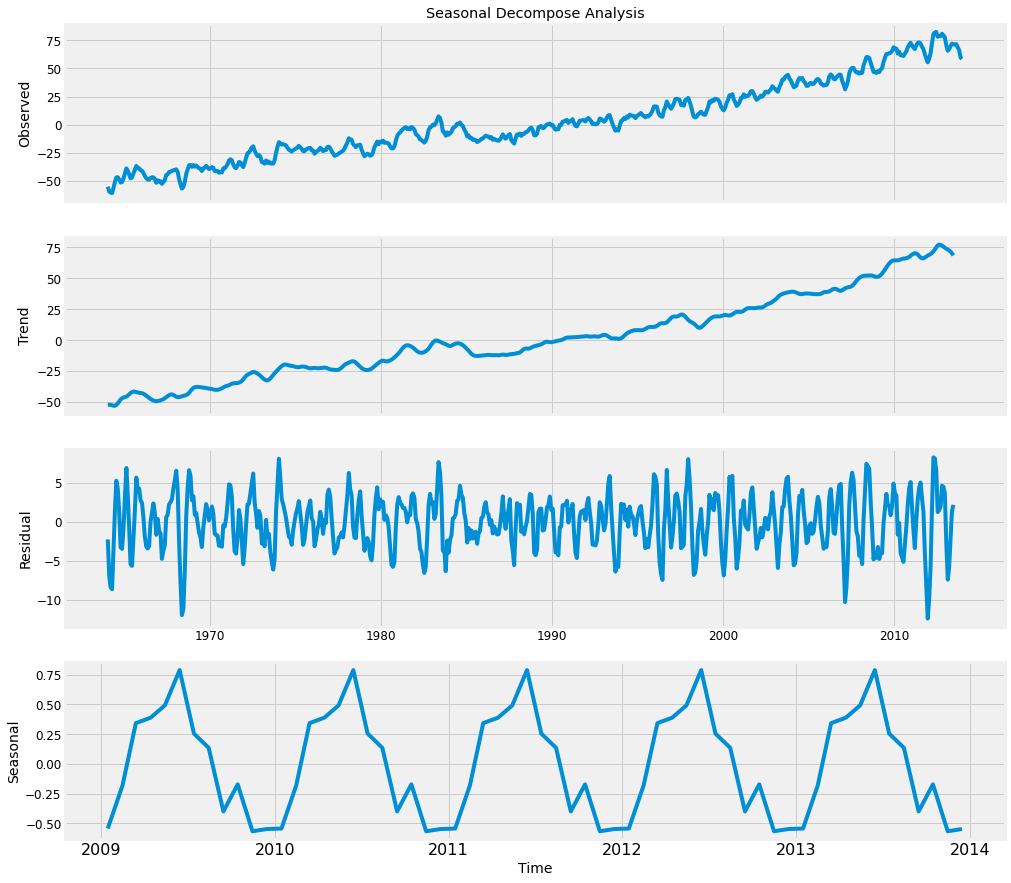

In [ ]:
# Additive model
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
res = sm.tsa.seasonal_decompose(sea_level_df["GMSL"].values,freq=12,model="additive")

fig, ax = plt.subplots(4,1,figsize=(15,15))
ax1 = plt.subplot(411)
plt.plot(sea_level_df["Time"][-600:], res.observed[-600:])
plt.tick_params('x', labelbottom=False)
plt.ylabel("Observed")
plt.title("Seasonal Decompose Analysis")
ax2 = plt.subplot(412, sharex=ax1)
plt.plot(sea_level_df["Time"][-600:], res.trend[-600:])
plt.tick_params('x', labelbottom=False)
plt.ylabel("Trend")
ax3 = plt.subplot(413, sharex=ax1)
plt.plot(sea_level_df["Time"][-600:], res.resid[-600:])
plt.tick_params('x', labelbottom=16)
plt.ylabel("Residual")
ax4 = plt.subplot(414)
plt.plot(sea_level_df["Time"][-60:], res.seasonal[-60:])
plt.tick_params('x', labelsize=16)
plt.ylabel("Seasonal")

plt.xlabel("Time")
plt.show()

## CO2 Emission Analysis

Plan:
1. First General Visualization of current entire dataset (Seperate line plot, integrated line plot, bar plot for contribution)
3. Total emission stationary anaysis. 12-month average, establish statistics and variables for ARIMA fitting (and prediction)
4. Find optimal parameters and build the model 
5. Tests and predictions
6. Conclusion to this section and discussion with other sections


### Visualization on current data


In [ ]:
Energy_sources.Value.head()

0        72.076
1        64.442
2        64.084
3        60.842
4        61.798
566      12.175
567      11.708
568      13.994
569      14.627
570      17.344
1132      2.375
1133      2.061
1134      1.171
1135      1.022
1136      0.949
1698      0.128
1699      0.106
1700      0.083
1701      0.130
1702      0.167
2264     24.867
2265     20.867
2266     19.780
2267     16.562
2268     17.754
2830     27.369
2831     23.034
2832     21.034
2833     17.714
2834     18.870
3604      0.031
3605      0.028
3606      0.031
3607      0.030
3608      0.031
4170      0.371
4171      0.335
4172      0.371
4173      0.359
4174      0.371
4528    111.621
4529     99.185
4530     99.112
4531     93.183
4532     98.012
Name: Value, dtype: float64

#### Line chart

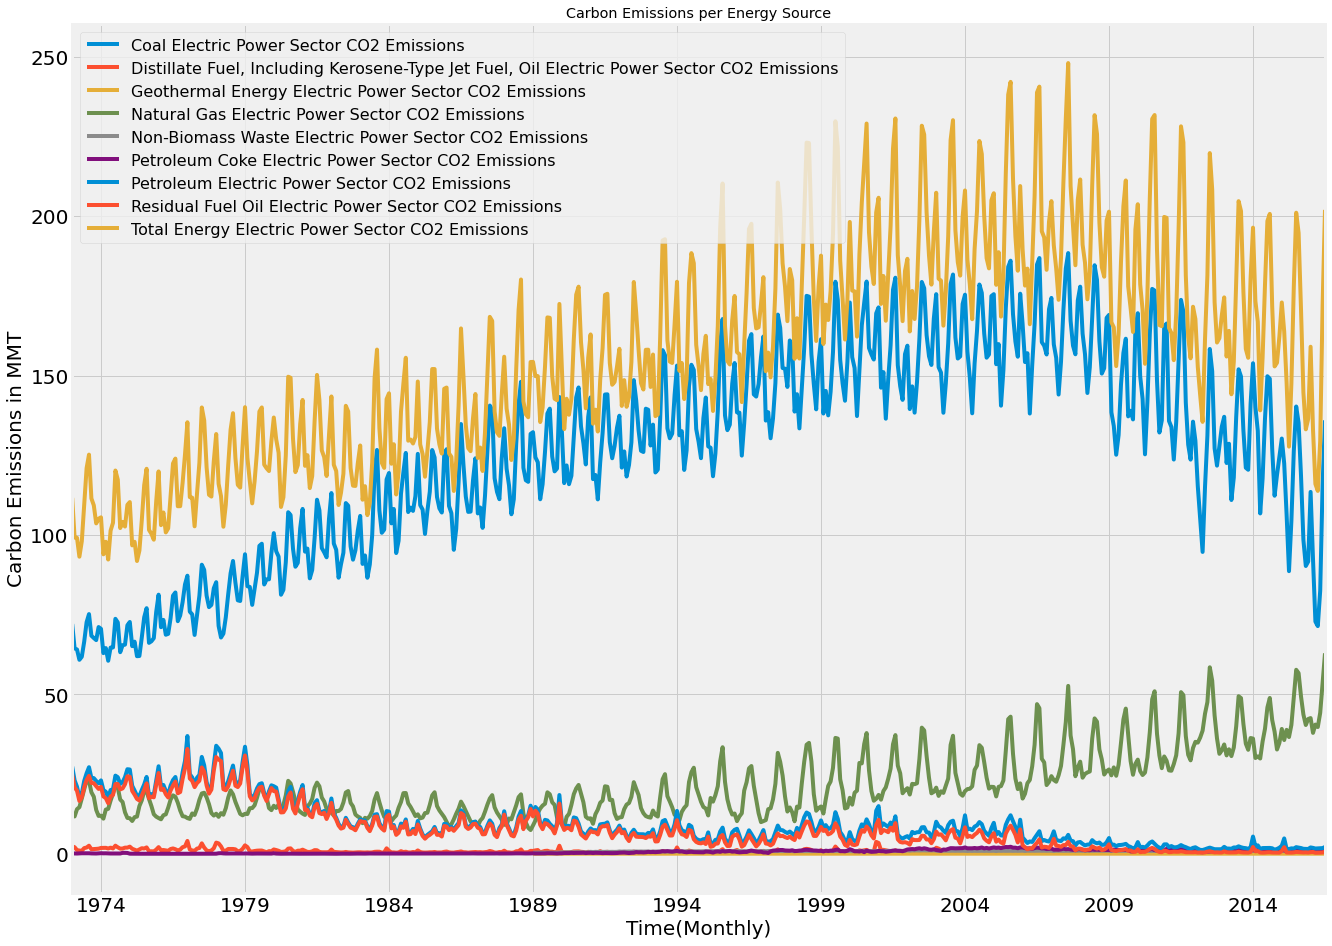

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

In [ ]:
rcParams['figure.figsize'] = 20, 16
fig, ax = plt.subplots()
plt.figure(figsize=(30,20))
for desc, group in Energy_sources:
    plt.figure(figsize=(30,20))
    group.plot(x = 'YYYYMM', y='Value', label=desc,ax = ax, title='Carbon Emissions per Energy Source', fontsize = 20)
    ax.set_xlabel('Time(Monthly)')
    ax.set_ylabel('Carbon Emissions in MMT')
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.legend(fontsize = 16)

We also want to see the visualized plot individually to see the trend and seasonality effect on co2 emission for each source.

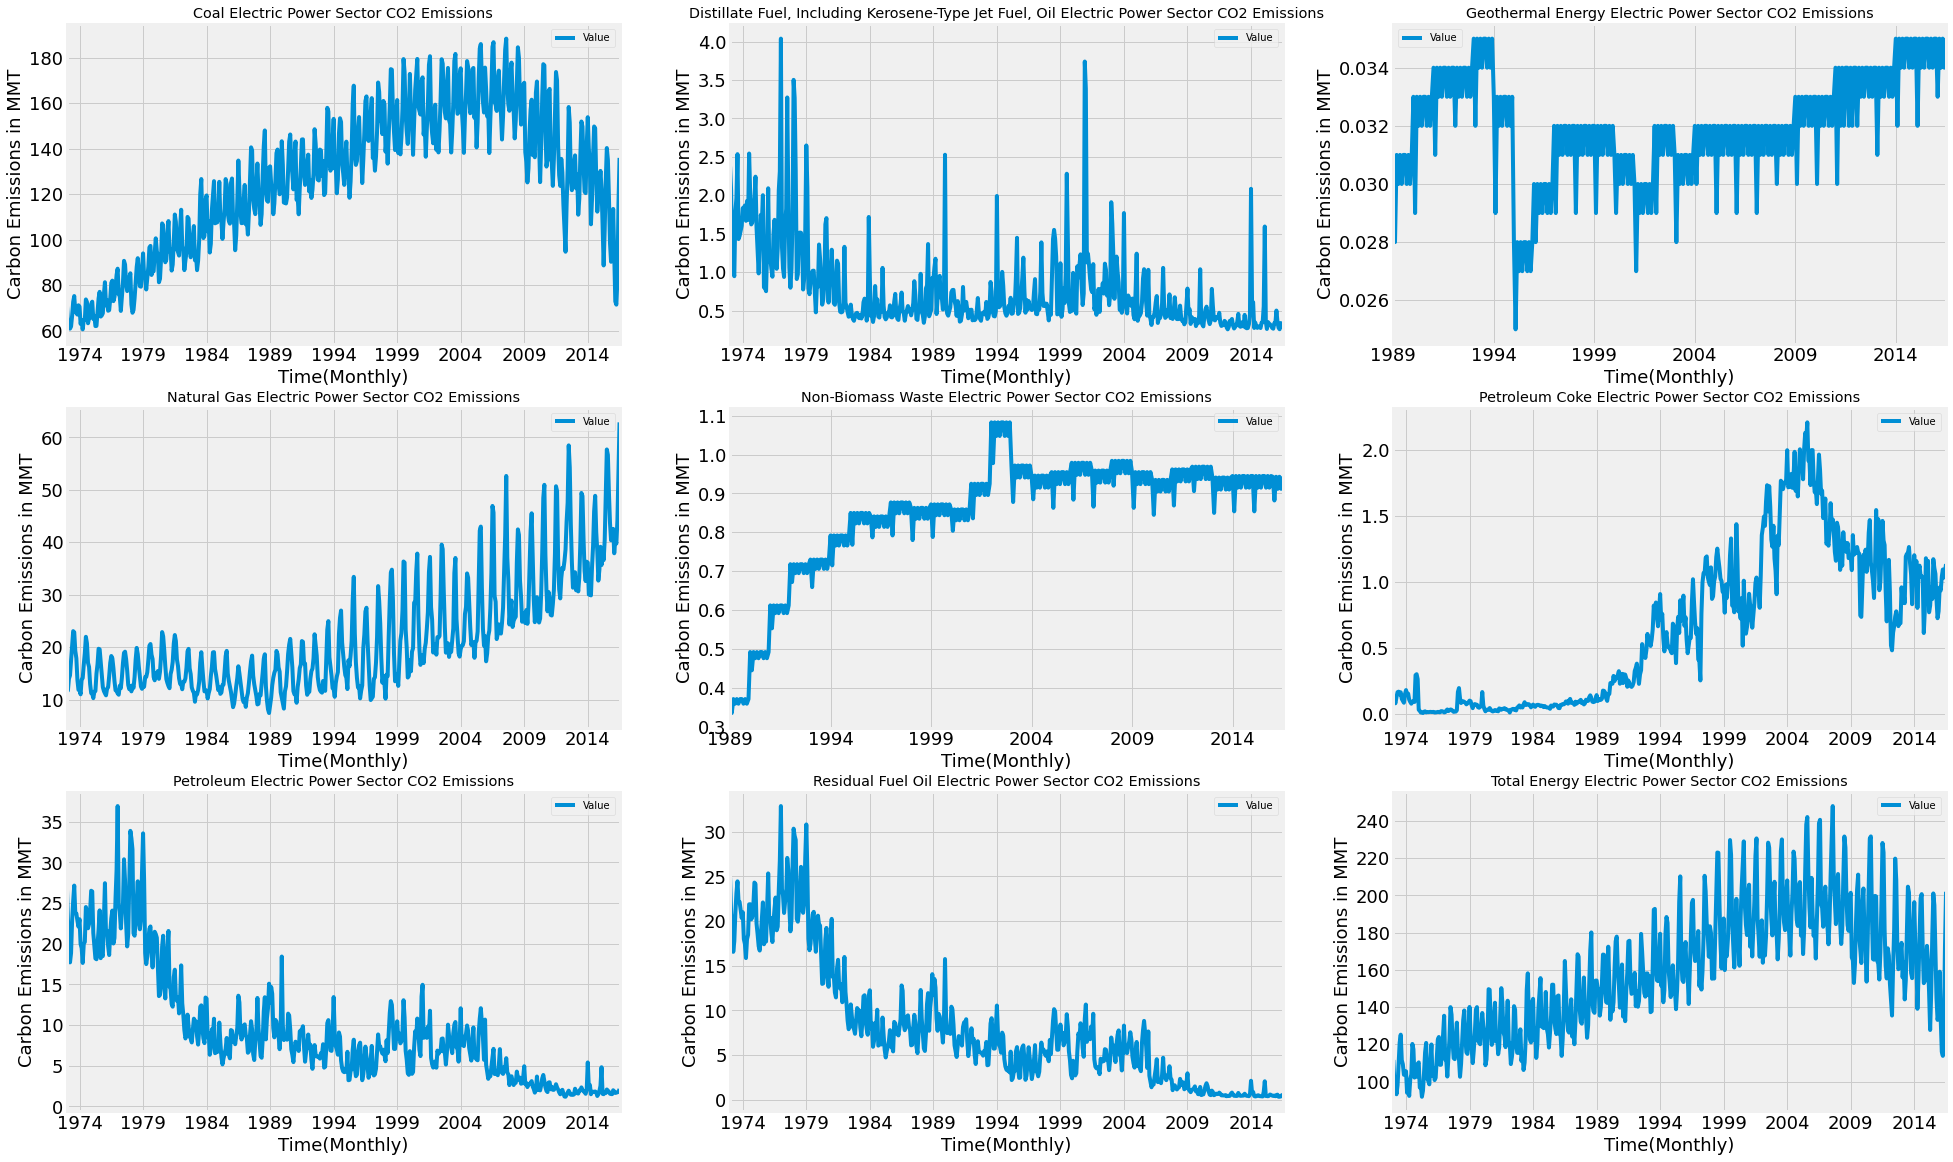

In [ ]:
fig, axes = plt.subplots(3,3, figsize = (30, 20))
for (desc, group), ax in zip(Energy_sources, axes.flatten()):
    group.plot(x = 'YYYYMM', y='Value',ax = ax, title=desc, fontsize = 18)
    ax.set_xlabel('Time(Monthly)')
    ax.set_ylabel('Carbon Emissions in MMT')
    ax.xaxis.label.set_size(18)
    ax.yaxis.label.set_size(18)

#### Bar chart

In [ ]:
CO2_per_source = co2_ts.groupby('Description')['Value'].sum().sort_values()
CO2_per_source.index
cols = ['Geothermal Energy', 'Non-Biomass Waste', 'Petroleum Coke','Distillate Fuel ', 'Residual Fuel Oil', 'Petroleum', 'Natural Gas', 'Coal', 'Total Emissions']

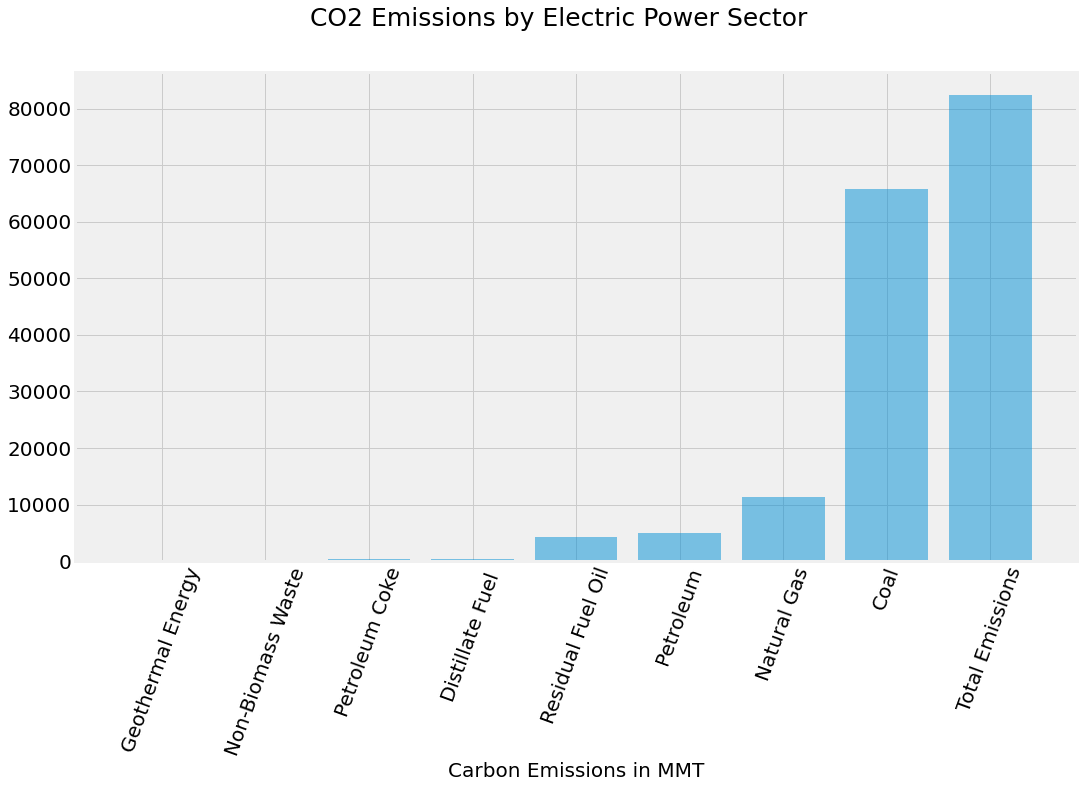

In [ ]:
fig = plt.figure(figsize = (16,9))
x_label = cols
x_tick = np.arange(len(cols))
plt.bar(x_tick, CO2_per_source, align = 'center', alpha = 0.5)
fig.suptitle("CO2 Emissions by Electric Power Sector", fontsize= 25)
plt.xticks(x_tick, x_label, rotation = 70, fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Carbon Emissions in MMT', fontsize = 20)
plt.show()

### Total Gas Emissions Stationaries

We want to perform some operations on the total emissions statistics to have a quick view of the stationaries of the data. There are several useful ways to do so: utilizing moving(rolling) averages by subtracting the original data by the rolling average; perform an exponential one; or removing seasonnalities and trends either by decomposing or differencing.

Since we want to model the total gas emission, we will be performing such technics on the total gas emission sector.

In [ ]:
emiss = co2_ts.iloc[:,1:]

In [ ]:
# We want to only focus on the Total Gas emission
emiss = emiss.groupby(['Description', pd.Grouper('YYYYMM')])['Value'].sum().unstack(level = 0)
mte = emiss['Total Energy Electric Power Sector CO2 Emissions'] # monthly total emissions (mte)
#mte.head(55)

So far, we've been working on a visualization for the general data. Now, let's focus on analyze a single group of data and perform some analysis. We are focusing on the total energy co2 emission.

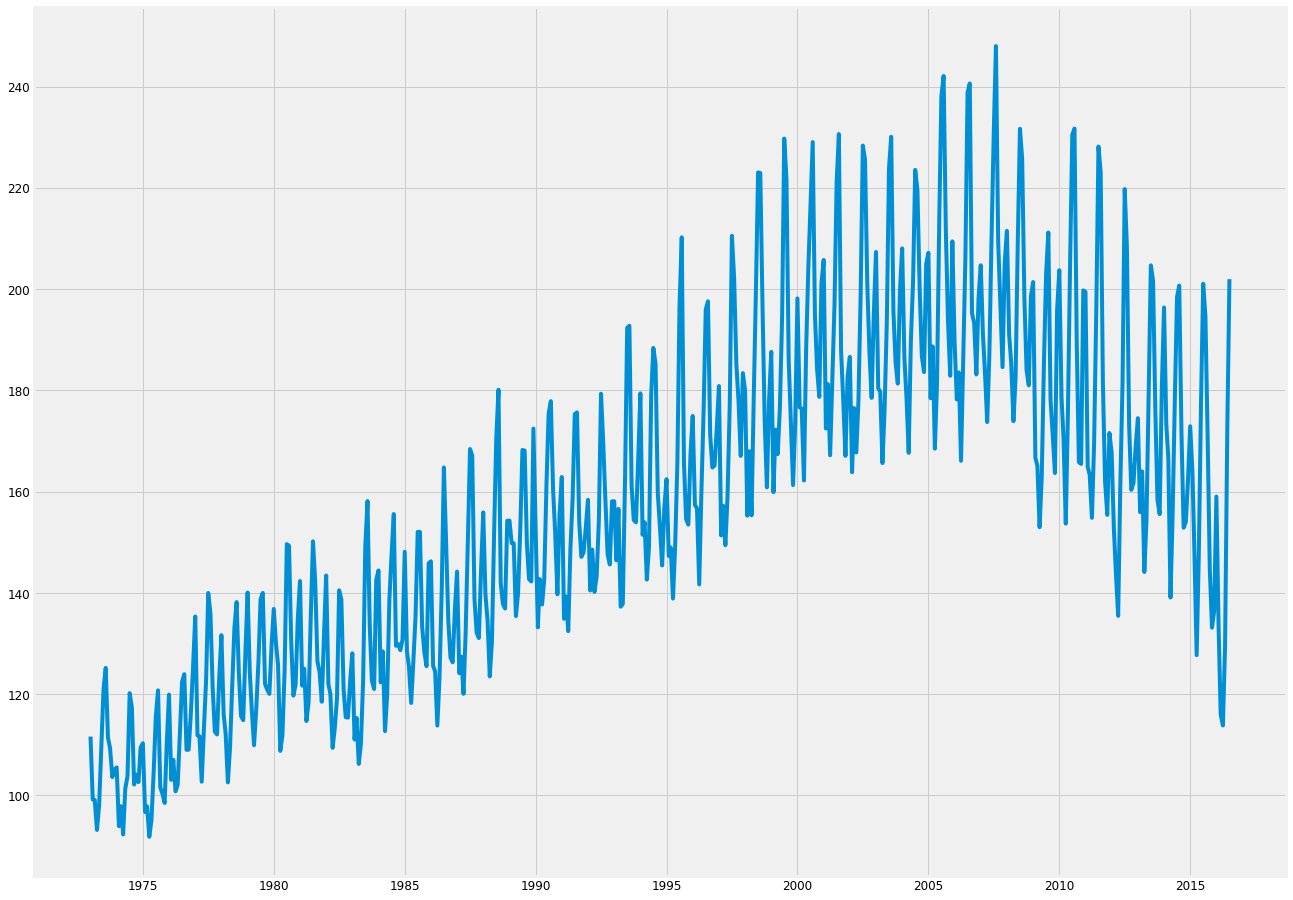

In [ ]:
plt.plot(mte)

The analytic method we are using here is creating moving average and moving variance, and see if the series mean and std change with time. We will create a visualized graph to show this. 

Another way for testing stationarity is to perform a statistical test like the Dickey-Fuller Test. The null hypothesis would be that the time series is non-stationary and the alternative would be that it is stationary. 

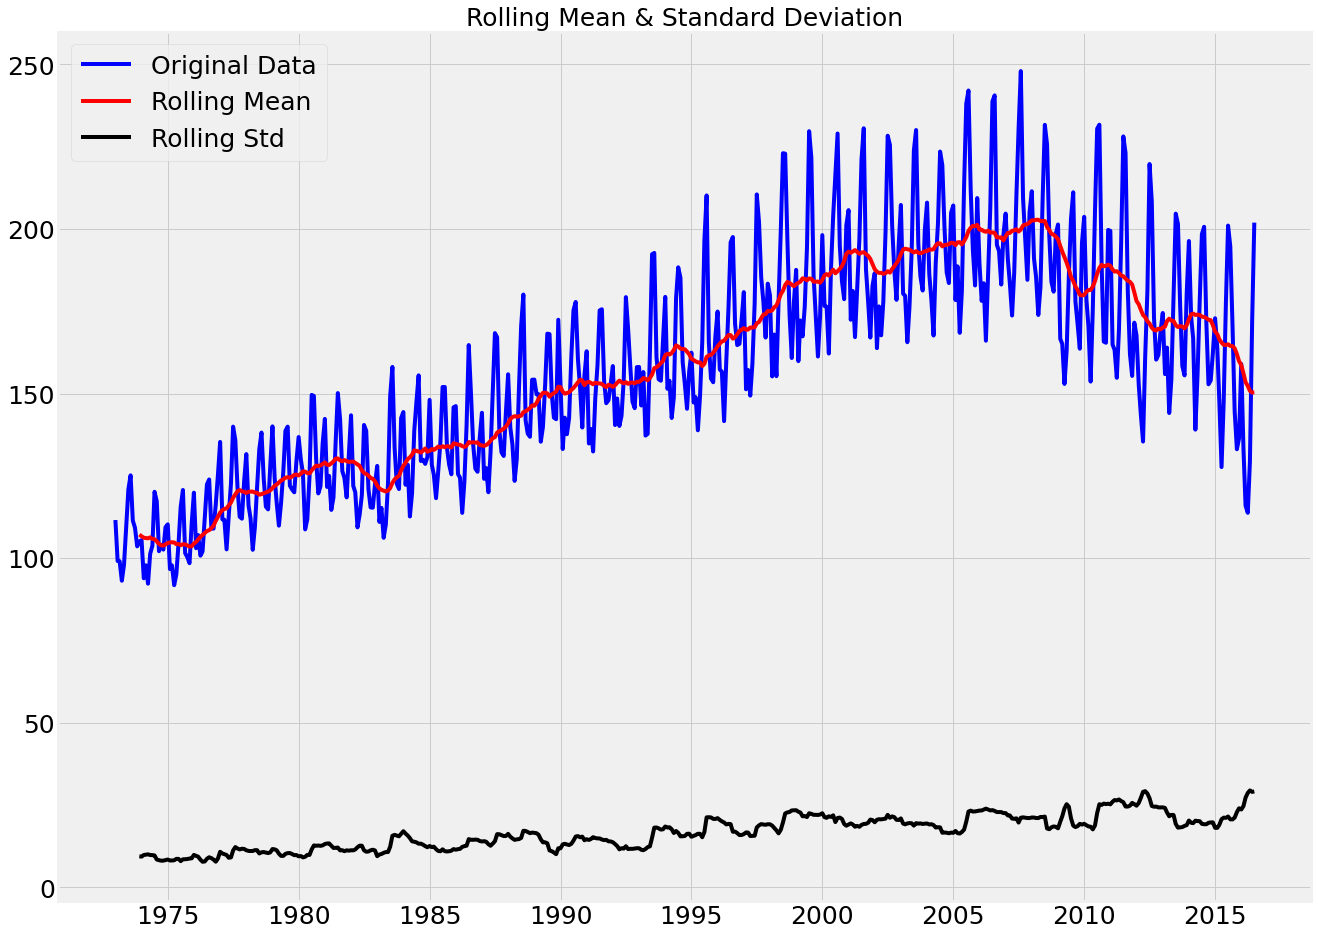

In [ ]:
PlotStationary(mte)

In [ ]:
AdfullerStationary(mte)

Test Statistic                  -1.809627
p-value                          0.375693
#Lags Used                      14.000000
Number of Observations Used    508.000000
Critical Value (1%)             -3.443288
Critical Value (5%)             -2.867246
Critical Value (10%)            -2.569809
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


From the test we know that the original data is not stationary

#### Eliminating trend and seasonality: Differencing

Out of all kinds of stationarilizing methods, we found eliminating trend and seasonlities by differencing the most useful.

If we want to remove the seasonality and trend of a data, we can try taking the difference between the observation and the previous one.

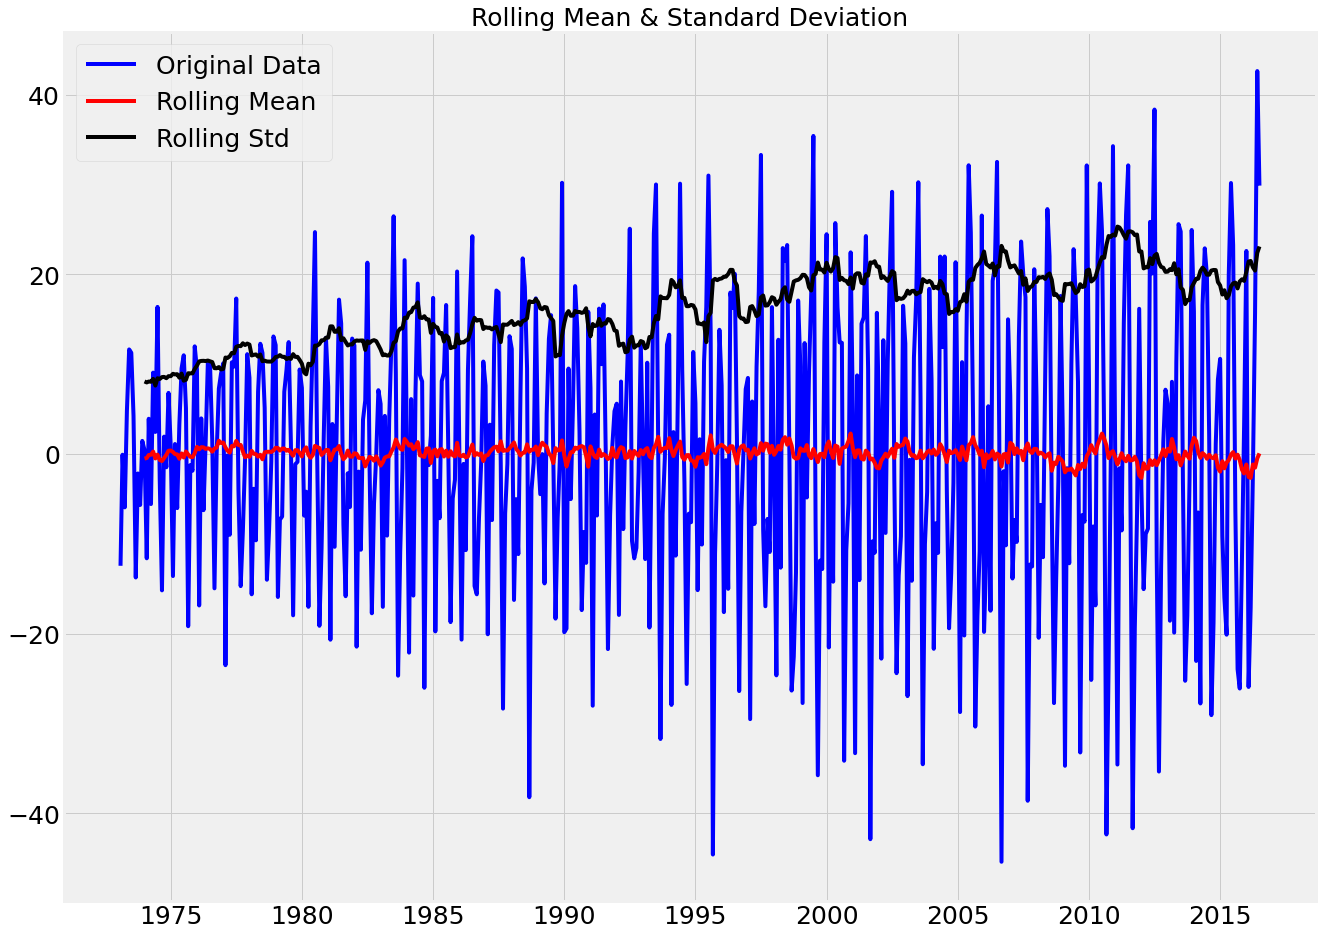

In [ ]:
mte_first_difference = mte - mte.shift(1)  
PlotStationary(mte_first_difference.dropna(inplace=False))

In [ ]:
AdfullerStationary(mte_first_difference.dropna(inplace=False))

Test Statistic                -6.610275e+00
p-value                        6.402884e-09
#Lags Used                     1.300000e+01
Number of Observations Used    5.080000e+02
Critical Value (1%)           -3.443288e+00
Critical Value (5%)           -2.867246e+00
Critical Value (10%)          -2.569809e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


Now lets see if we make the time difference to 12 months, what would happen.

Test Statistic                  -5.495918
p-value                          0.000002
#Lags Used                      12.000000
Number of Observations Used    498.000000
Critical Value (1%)             -3.443549
Critical Value (5%)             -2.867361
Critical Value (10%)            -2.569870
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


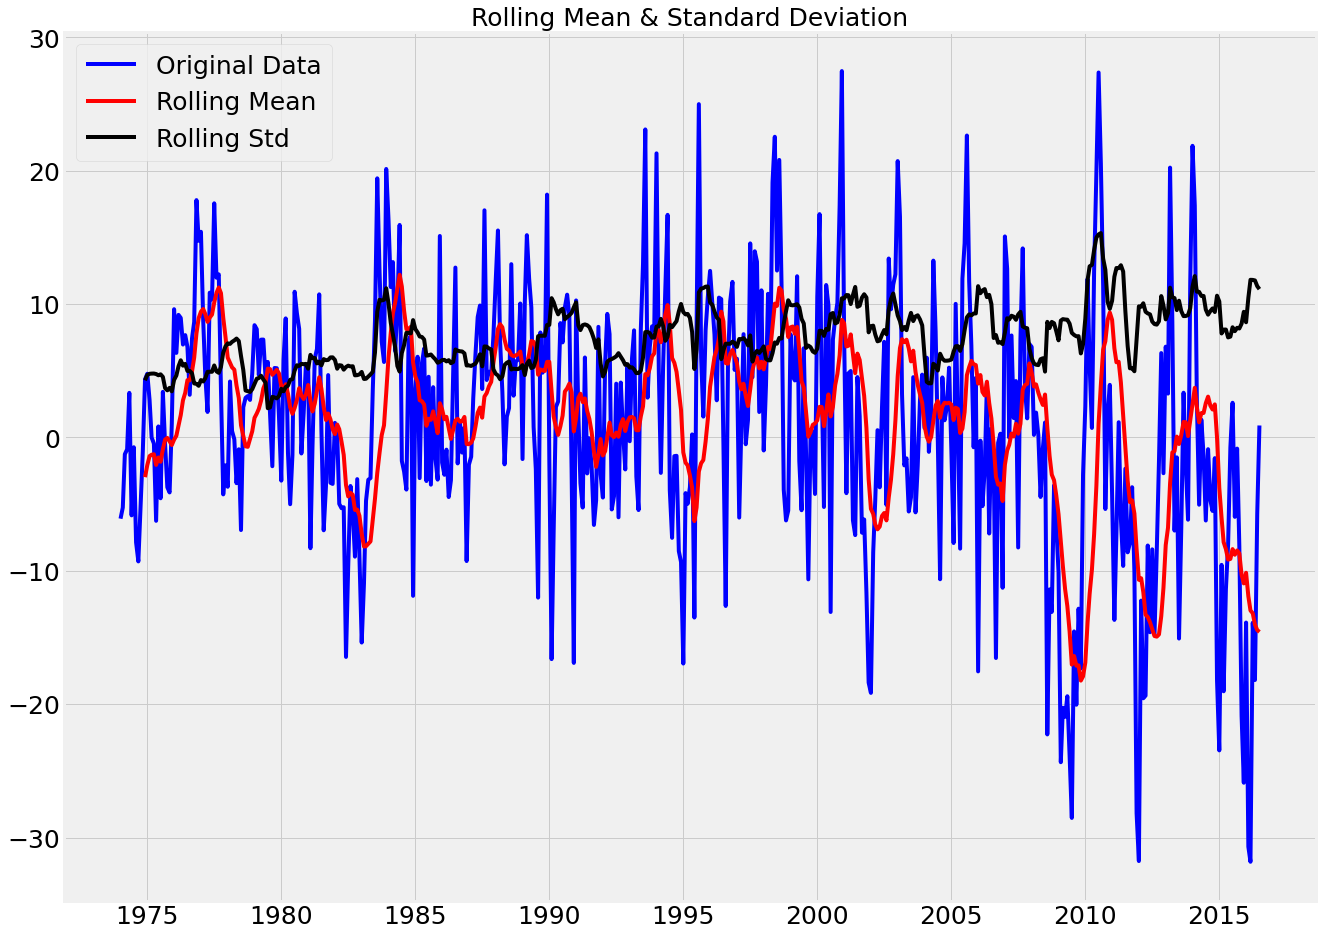

In [ ]:
mte_seasonal_difference = mte - mte.shift(12)  
PlotStationary(mte_seasonal_difference.dropna(inplace=False))
AdfullerStationary(mte_seasonal_difference.dropna(inplace=False))

We may observe that the second diff is less continuous than the first one, this is due to a 12 months gap. We can see from the test that the stationarity improves from the original data, but not as good as the first difference. Hence, we can try taking the first differnce first and then apply a 12 months difference.

Test Statistic                -8.574894e+00
p-value                        8.012370e-14
#Lags Used                     1.400000e+01
Number of Observations Used    4.950000e+02
Critical Value (1%)           -3.443630e+00
Critical Value (5%)           -2.867397e+00
Critical Value (10%)          -2.569889e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


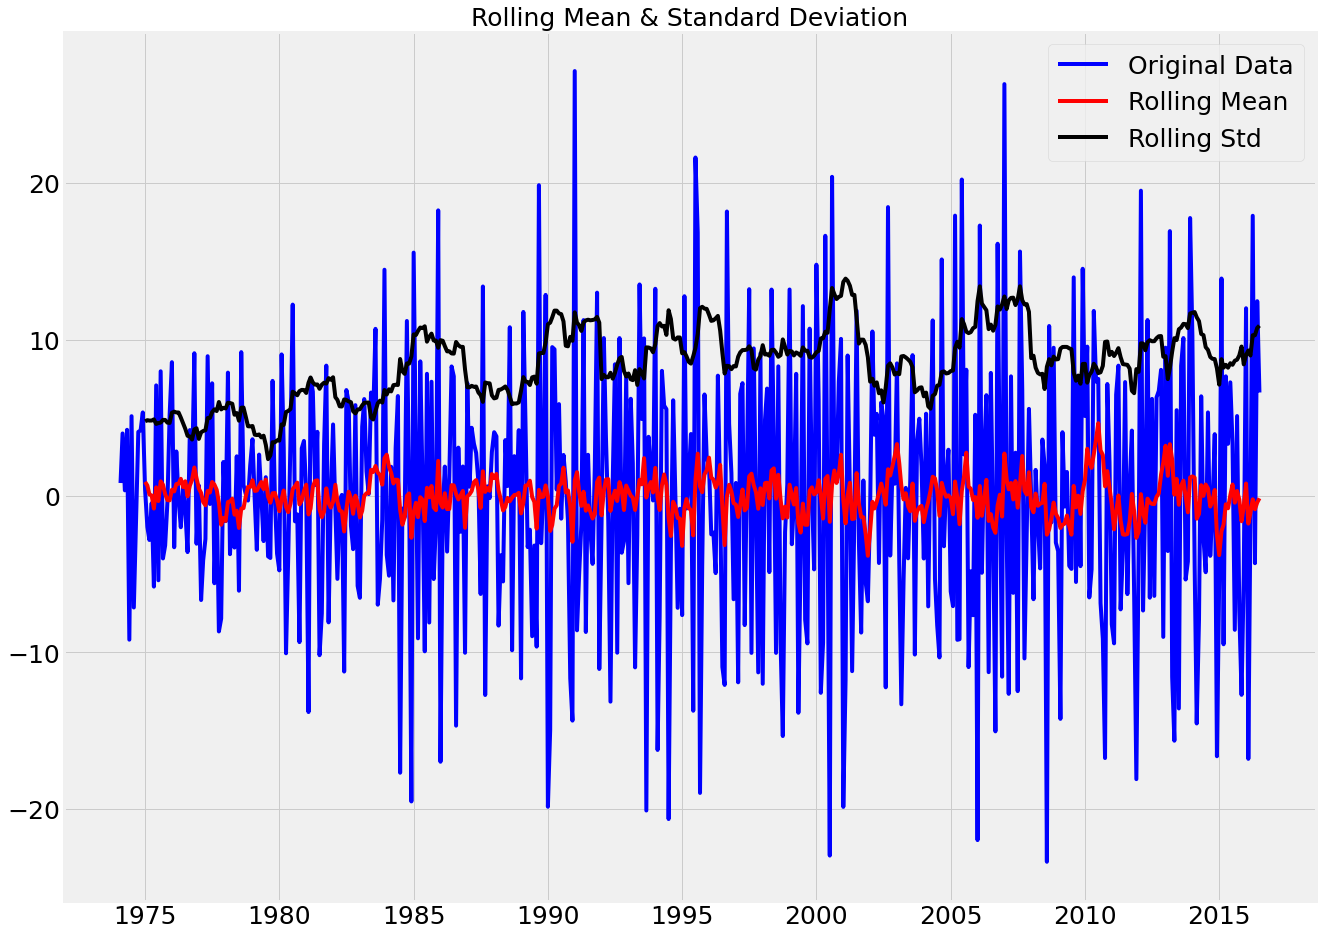

In [ ]:
mte_seasonal_first_difference = mte_first_difference - mte_first_difference.shift(12)  
PlotStationary(mte_seasonal_first_difference.dropna(inplace=False))
AdfullerStationary(mte_seasonal_first_difference.dropna(inplace=False))

## Temperature Analysis 

In this section, let's create a general visualization of two temperature datasets

Let's check both date frames

In [ ]:
temperature_df.head(5)

dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
1200 1850-01-01                   0.749                              1.105   
1201 1850-02-01                   3.071                              1.275   
1202 1850-03-01                   4.954                              0.955   
1203 1850-04-01                   7.217                              0.665   
1204 1850-05-01                  10.004                              0.617   

      LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
1200               8.242                          1.738              -3.206   
1201               9.970                          3.007              -2.291   
1202              10.347                          2.401              -1.905   
1203              12.934                          1.004               1.018   
1204              15.655                          2.406               3.811   

      LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
1200                          2.822                          12.833   
1201                          1.623                          13.588   
1202                          1.410                          14.043   
1203                          1.329                          14.667   
1204                          1.347                          15.507   

      LandAndOceanAverageTemperatureUncertainty  Year  Month  Day  
1200                                      0.367  1850      1    1  
1201                                      0.414  1850      2    1  
1202                                      0.341  1850      3    1  
1203                                      0.267  1850      4    1  
1204                                      0.249  1850      5    1

In [ ]:
country_temperature_df.head(5)

dt  AverageTemperature  AverageTemperatureUncertainty Country  Year  \
0 1743-11-01               4.384                          2.294   Åland  1743   
5 1744-04-01               1.530                          4.680   Åland  1744   
6 1744-05-01               6.702                          1.789   Åland  1744   
7 1744-06-01              11.609                          1.577   Åland  1744   
8 1744-07-01              15.342                          1.410   Åland  1744   

   Month  Day  
0     11    1  
5      4    1  
6      5    1  
7      6    1  
8      7    1

### Global Temperature Visualization

In this section, we are going to plot the global temperature measures

Limit the `year` on the `temperature_df` to reduce clutter of visualization

In [ ]:
plot_temperature_df = temperature_df[temperature_df['Year'] >= 1880]

Plot the raw data of `plot_temperature_df` of the different columns versus time

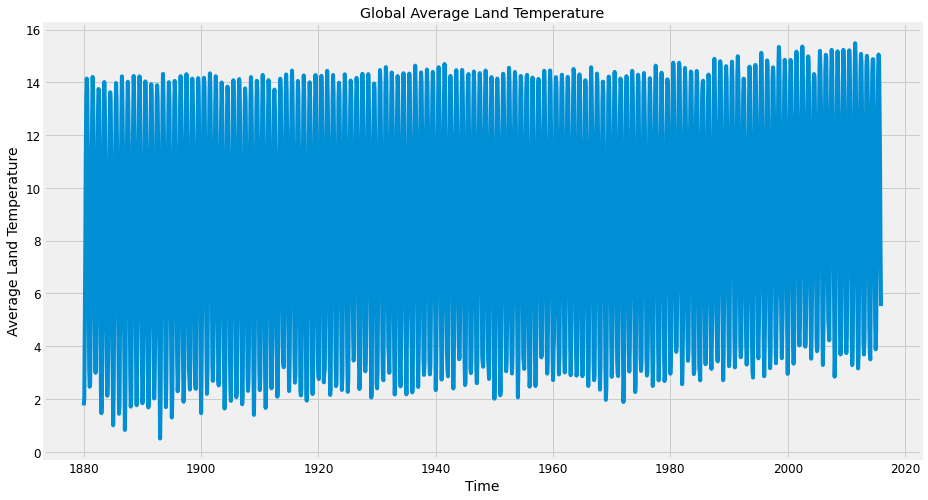

In [ ]:
plt.figure(figsize=(14,8))
plt.title('Global Average Land Temperature')
plt.xlabel('Time')
plt.ylabel('Average Land Temperature')
plt.plot(plot_temperature_df['dt'], plot_temperature_df['LandAverageTemperature'])

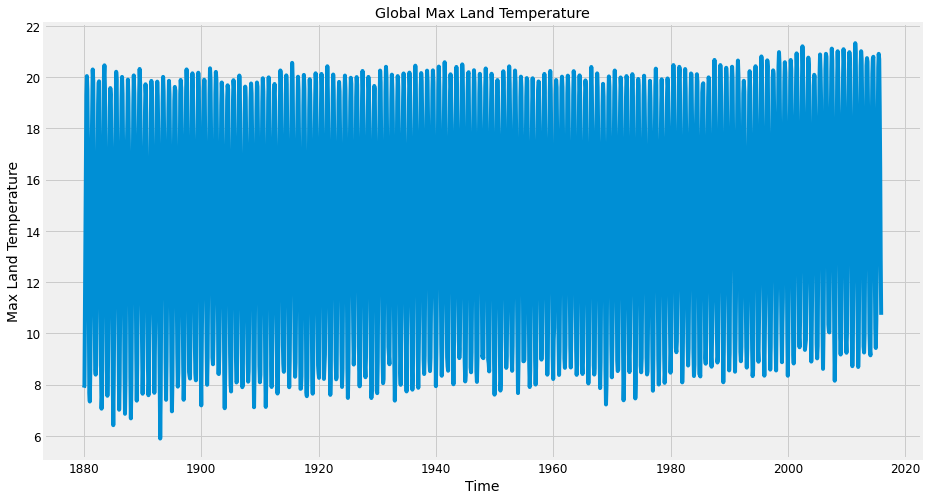

In [ ]:
plt.figure(figsize=(14,8))
plt.title('Global Max Land Temperature')
plt.xlabel('Time')
plt.ylabel('Max Land Temperature')
plt.plot(plot_temperature_df['dt'], plot_temperature_df['LandMaxTemperature'])

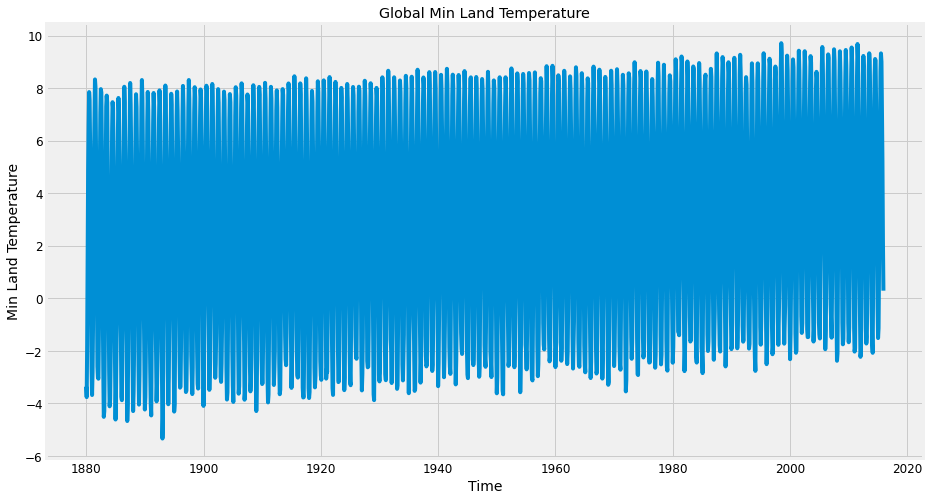

In [ ]:
plt.figure(figsize=(14,8))
plt.title('Global Min Land Temperature')
plt.xlabel('Time')
plt.ylabel('Min Land Temperature')
plt.plot(plot_temperature_df['dt'], plot_temperature_df['LandMinTemperature'])

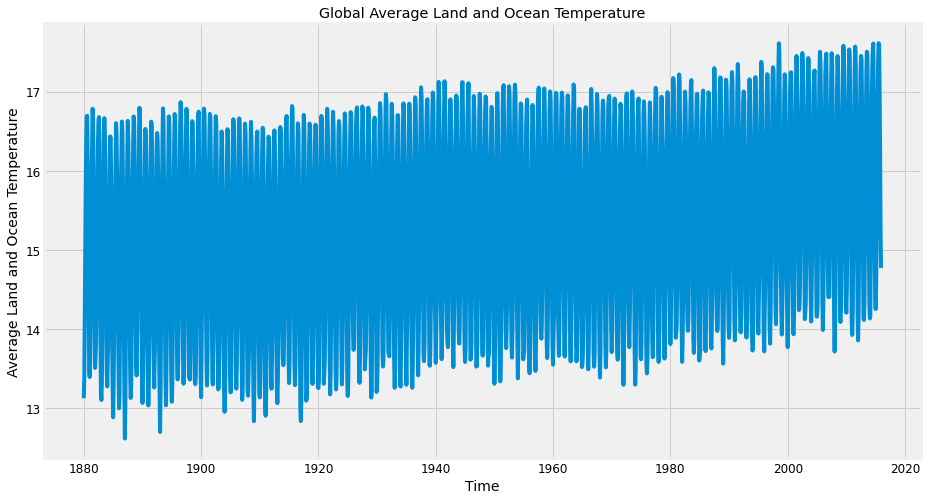

In [ ]:
plt.figure(figsize=(14,8))
plt.title('Global Average Land and Ocean Temperature')
plt.xlabel('Time')
plt.ylabel('Average Land and Ocean Temperature')
plt.plot(plot_temperature_df['dt'], plot_temperature_df['LandAndOceanAverageTemperature'])

### Country Temperature Visualization

In this section, we are going to plot the country temperature measures

Limit the `year` on the `country_temperature_df` to reduce clutter of visualization

In [ ]:
plot_country_temp_df = country_temperature_df[country_temperature_df['Year'] >= 1880]

Now, let's create sperate df for the common countries to explore and visualize

In [ ]:
united_states_temp_df = plot_country_temp_df[plot_country_temp_df['Country'] == 'United States']

In [ ]:
united_kingdom_temp_df = plot_country_temp_df[plot_country_temp_df['Country'] == 'United Kingdom']

In [ ]:
brazil_temp_df = plot_country_temp_df[plot_country_temp_df['Country'] == 'Brazil']

In [ ]:
japan_temp_df = plot_country_temp_df[plot_country_temp_df['Country'] == 'Japan']

In [ ]:
russia_temp_df = plot_country_temp_df[plot_country_temp_df['Country'] == 'Russia']

In [ ]:
china_temp_df = plot_country_temp_df[plot_country_temp_df['Country'] == 'China']

In [ ]:
turkey_temp_df = plot_country_temp_df[plot_country_temp_df['Country'] == 'Turkey']

In [ ]:
south_africa_temp_df = plot_country_temp_df[plot_country_temp_df['Country'] == 'South Africa']

Let's see the Average Temperature for each different country

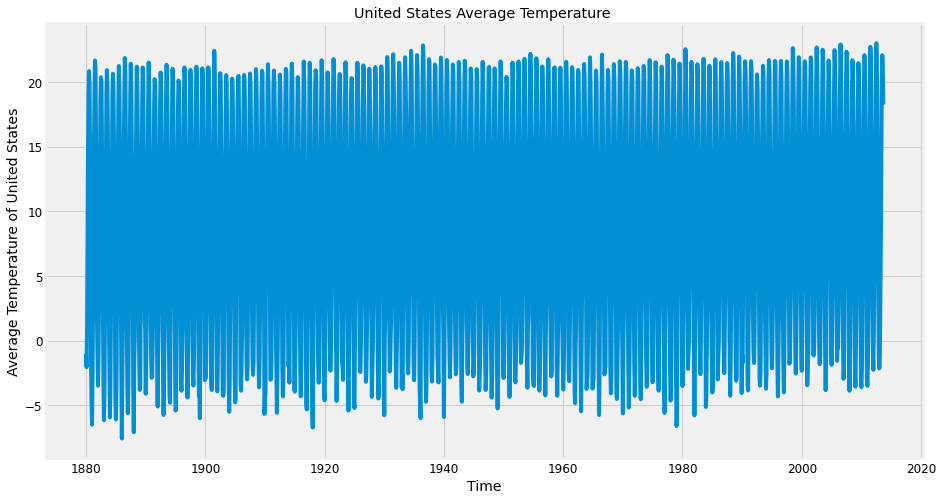

In [ ]:
plt.figure(figsize=(14,8))
plt.title('United States Average Temperature ')
plt.xlabel('Time')
plt.ylabel('Average Temperature of United States')
plt.plot(united_states_temp_df['dt'], united_states_temp_df['AverageTemperature'])

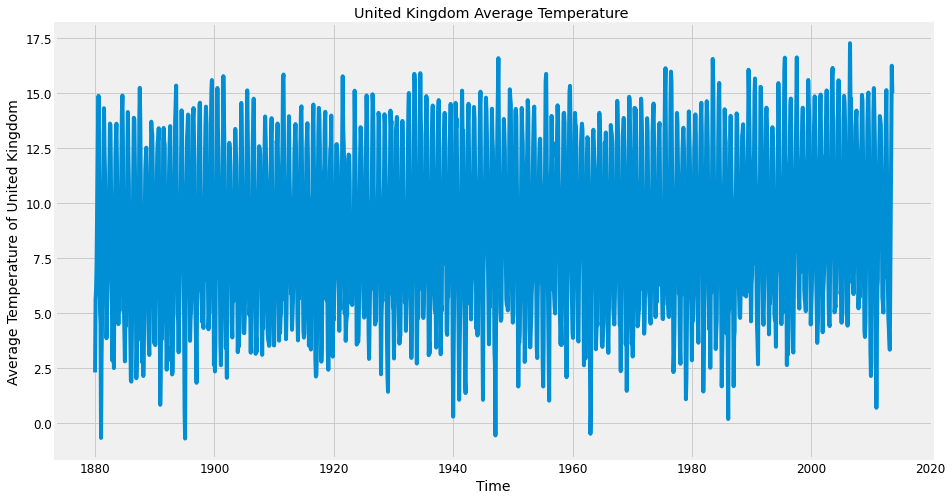

In [ ]:
plt.figure(figsize=(14,8))
plt.title('United Kingdom Average Temperature ')
plt.xlabel('Time')
plt.ylabel('Average Temperature of United Kingdom')
plt.plot(united_kingdom_temp_df['dt'], united_kingdom_temp_df['AverageTemperature'])

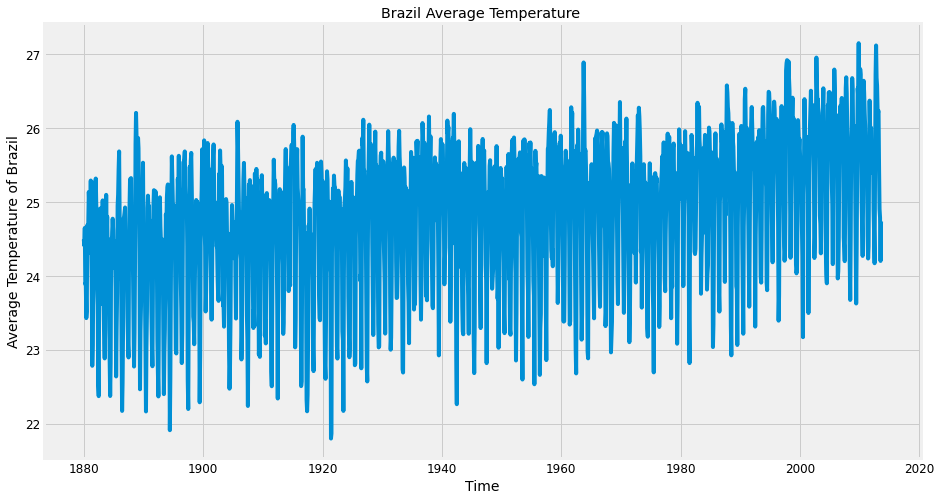

In [ ]:
plt.figure(figsize=(14,8))
plt.title('Brazil Average Temperature ')
plt.xlabel('Time')
plt.ylabel('Average Temperature of Brazil')
plt.plot(brazil_temp_df['dt'], brazil_temp_df['AverageTemperature'])

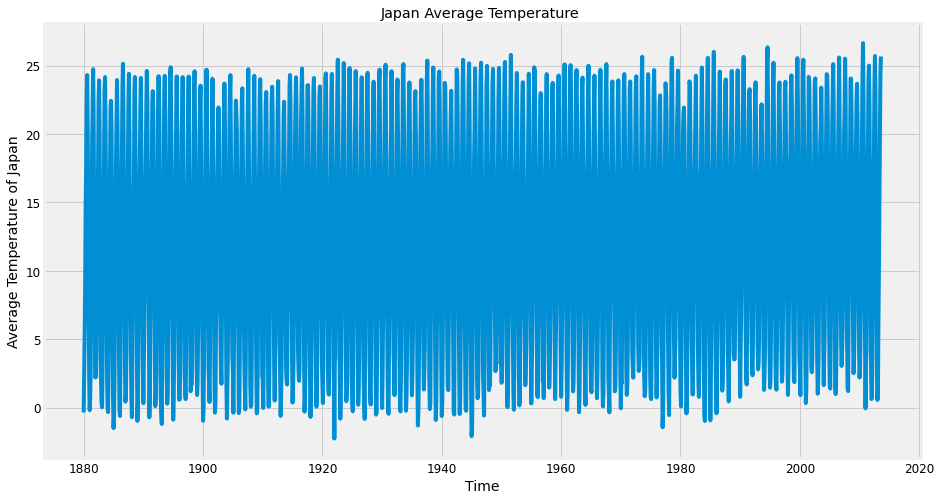

In [ ]:
plt.figure(figsize=(14,8))
plt.title('Japan Average Temperature ')
plt.xlabel('Time')
plt.ylabel('Average Temperature of Japan')
plt.plot(japan_temp_df['dt'], japan_temp_df['AverageTemperature'])

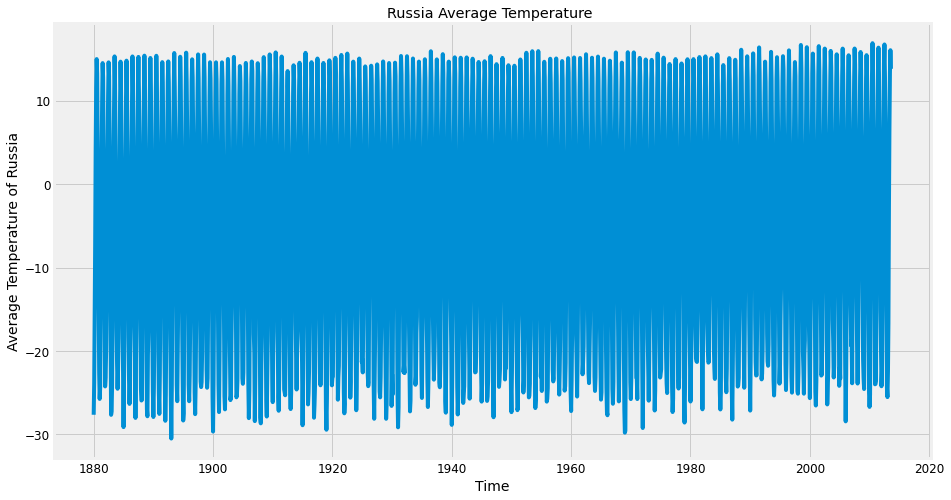

In [ ]:
plt.figure(figsize=(14,8))
plt.title('Russia Average Temperature ')
plt.xlabel('Time')
plt.ylabel('Average Temperature of Russia')
plt.plot(russia_temp_df['dt'], russia_temp_df['AverageTemperature'])

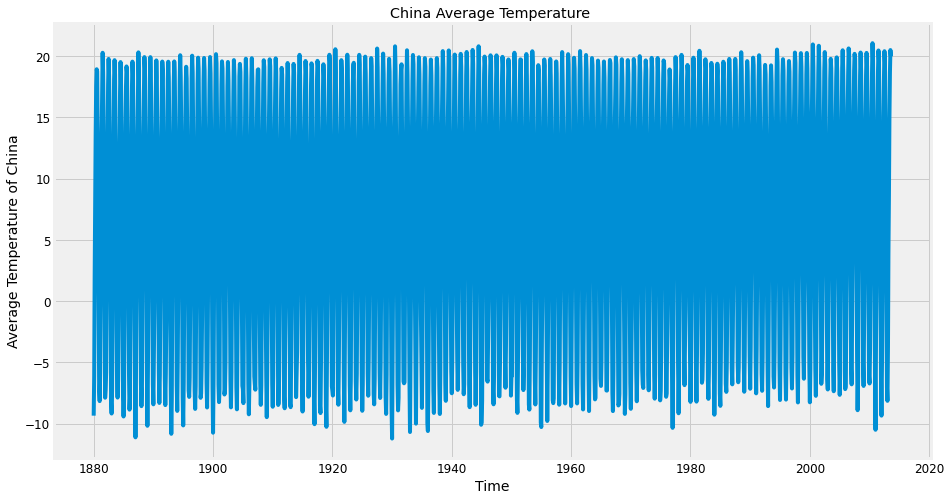

In [ ]:
plt.figure(figsize=(14,8))
plt.title('China Average Temperature ')
plt.xlabel('Time')
plt.ylabel('Average Temperature of China')
plt.plot(china_temp_df['dt'], china_temp_df['AverageTemperature'])

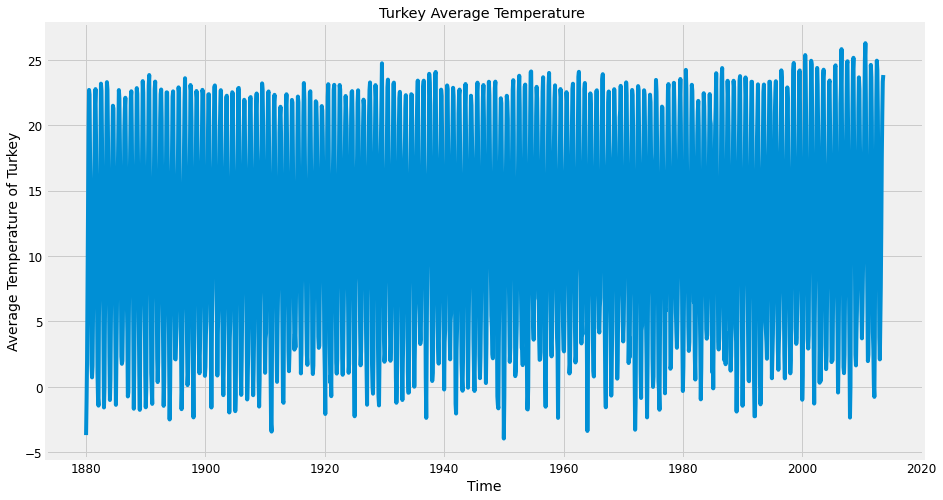

In [ ]:
plt.figure(figsize=(14,8))
plt.title('Turkey Average Temperature ')
plt.xlabel('Time')
plt.ylabel('Average Temperature of Turkey')
plt.plot(turkey_temp_df['dt'], turkey_temp_df['AverageTemperature'])

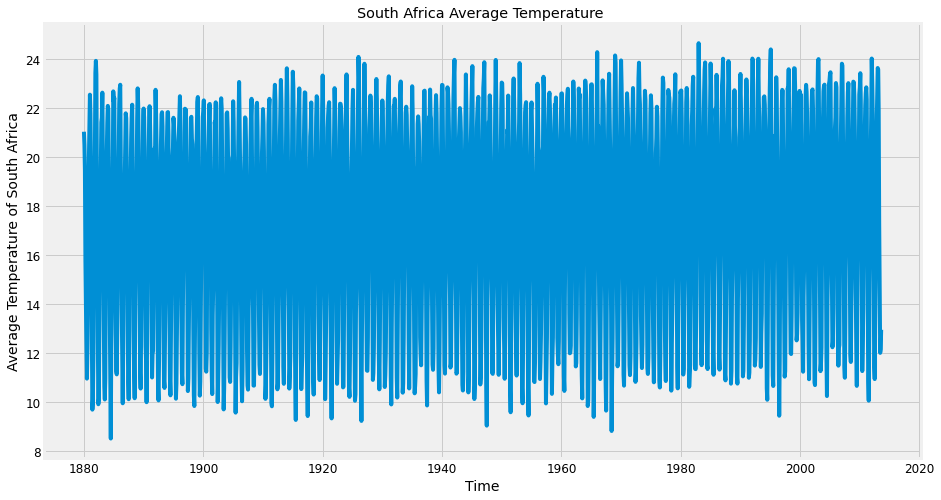

In [ ]:
plt.figure(figsize=(14,8))
plt.title('South Africa Average Temperature ')
plt.xlabel('Time')
plt.ylabel('Average Temperature of South Africa')
plt.plot(south_africa_temp_df['dt'], south_africa_temp_df['AverageTemperature'])

### Rolling Mean of Average Global Land Temperature

Calculate the rolling mean and standard deviation in a one year period. We can find from the result that the average global temperature has been rising while the standard deviation keeps a very low level, which indicates that the temperature level rised stably.

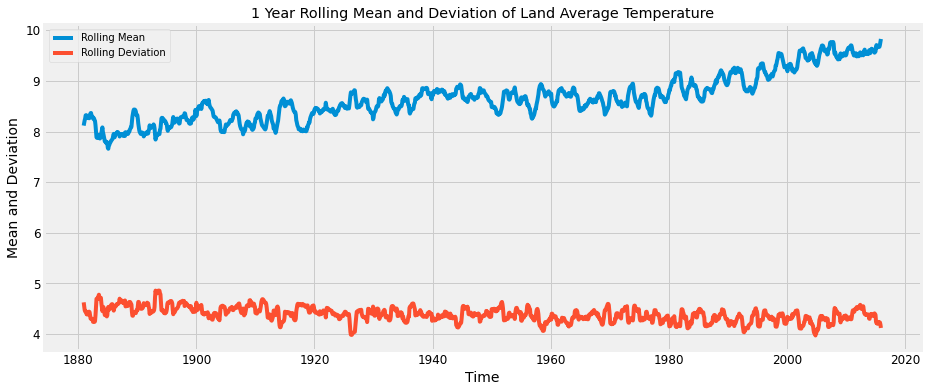

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(plot_temperature_df["dt"], plot_temperature_df["LandAverageTemperature"].rolling(window=12,center=False).mean(),label='Rolling Mean')
plt.plot(plot_temperature_df["dt"], plot_temperature_df["LandAverageTemperature"].rolling(window=12,center=False).std(),label='Rolling Deviation')
plt.xlabel("Time")
plt.ylabel("Mean and Deviation")
plt.title("1 Year Rolling Mean and Deviation of Land Average Temperature")
plt.legend()

# Data Modeling

### Sea Level SARIMAX Model

Because the sea level data is not stationary, so we are using the SARIMAX model.

#### Model

In [ ]:
sl_model = sm.tsa.statespace.SARIMAX(sea_level_df_index["GMSL"], order=(2, 0, 4), seasonal_order=(3, 1, 2, 12), enforce_stationarity=False, enforce_invertibility=False)
sl_results = sl_model.fit()

In [ ]:
sl_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                               GMSL   No. Observations:                 1608
Model:             SARIMAX(2, 0, 4)x(3, 1, 2, 12)   Log Likelihood               -3489.121
Date:                            Mon, 02 May 2022   AIC                           7002.243
Time:                                    18:28:47   BIC                           7066.457
Sample:                                         0   HQIC                          7026.119
                                           - 1608                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5312      0.049     31.395      0.000       1.436       1.627
ar.L2         -0.5312      0.049    -10.896      0.000      -0.627      -0.436
ma.L1         -0.2036      0.052     -3.947      0.000      -0.305      -0.103
ma.L2          0.1947      0.019     10.173      0.000       0.157       0.232
ma.L3         -0.6736      0.023    -28.961      0.000      -0.719      -0.628
ma.L4         -0.1004      0.036     -2.801      0.005      -0.171      -0.030
ar.S.L12      -0.5503      0.144     -3.815      0.000      -0.833      -0.268
ar.S.L24      -0.0514      0.023     -2.252      0.024      -0.096      -0.007
ar.S.L36       0.0064      0.003      1.860      0.063      -0.000       0.013
ma.S.L12      -0.4359      0.147     -2.964      0.003      -0.724      -0.148
ma.S.L24      -0.4862      0.141     -3.455      0.001      -0.762      -0.210
sigma2         5.0470      0.155     32.480      0.000       4.742       5.352
===================================================================================
Ljung-Box (Q):                       83.39   Jarque-Bera (JB):                56.52
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.40   Skew:                            -0.00
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Text(0.5, 1.0, 'Residual Plot')

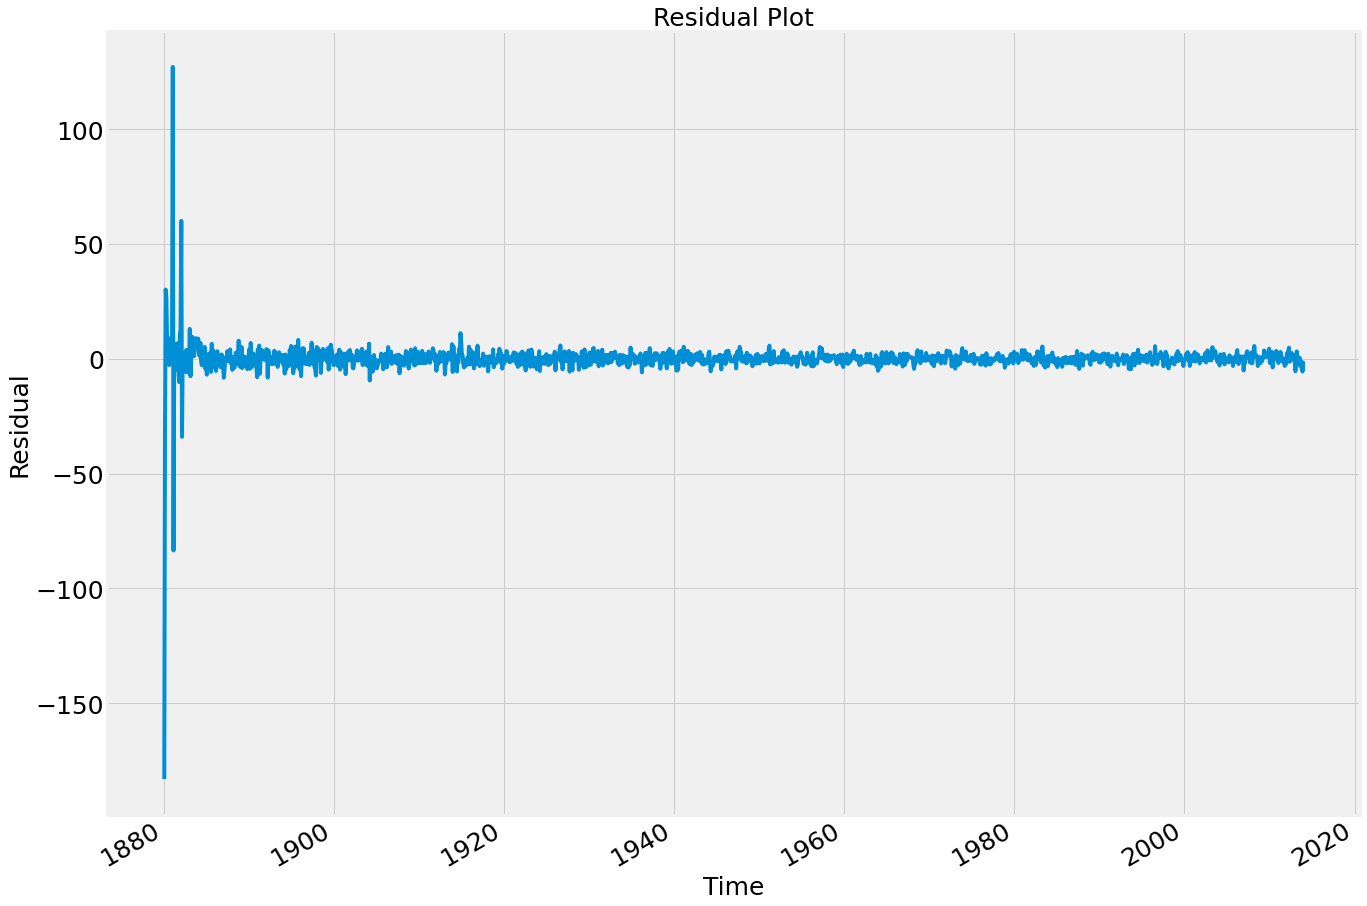

In [ ]:
sl_results.resid.plot()
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel("Time",fontsize = 25)
plt.ylabel("Residual",fontsize = 25)
plt.title("Residual Plot",fontsize = 25)

Text(0, 0.5, 'Density')

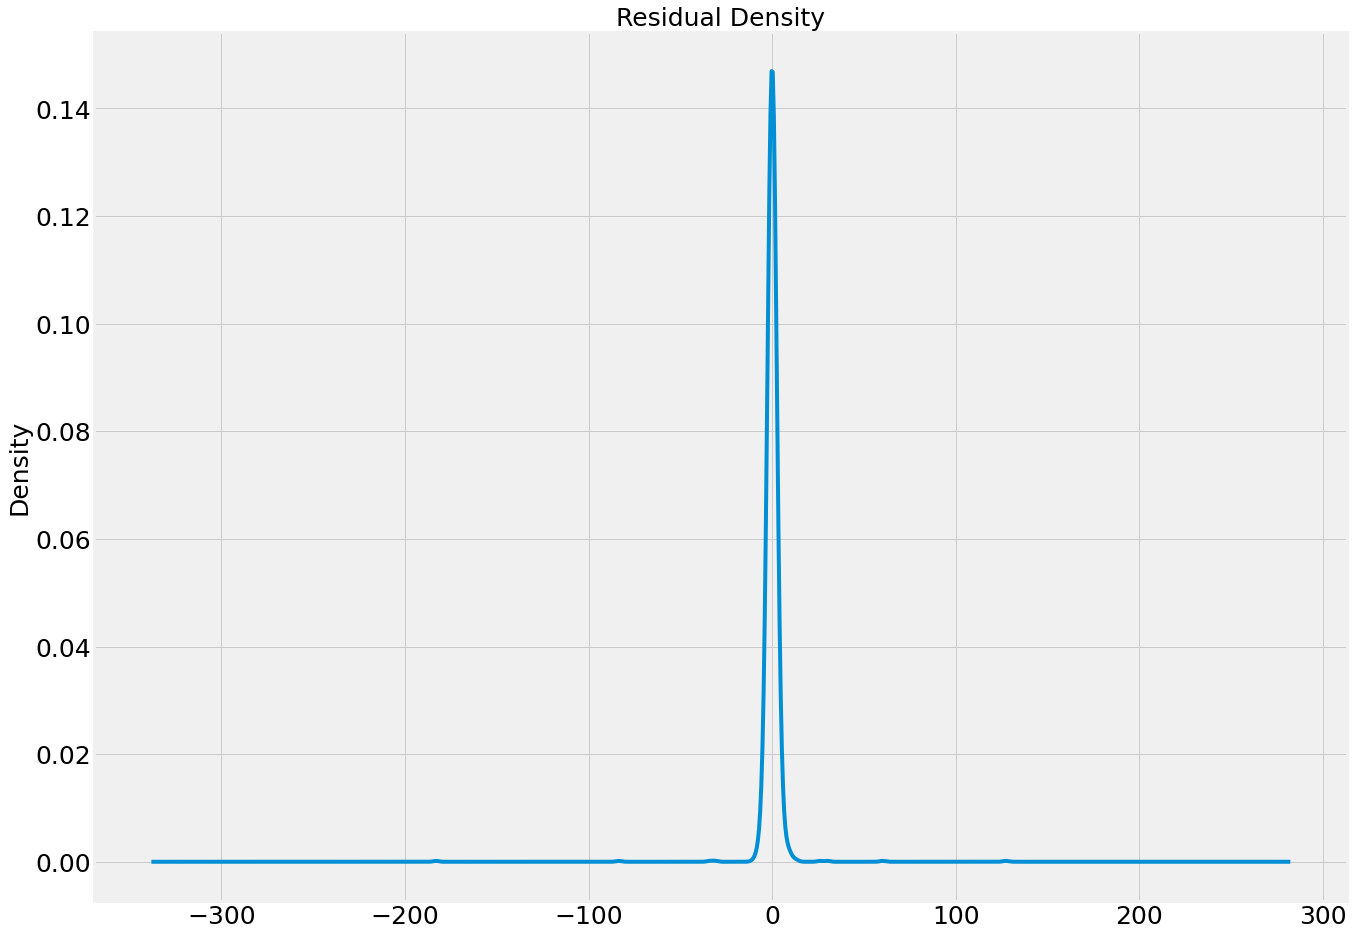

In [ ]:
sl_results.resid.plot(kind='kde')
plt.title("Residual Density", fontsize = 25)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.ylabel("Density",fontsize = 25)

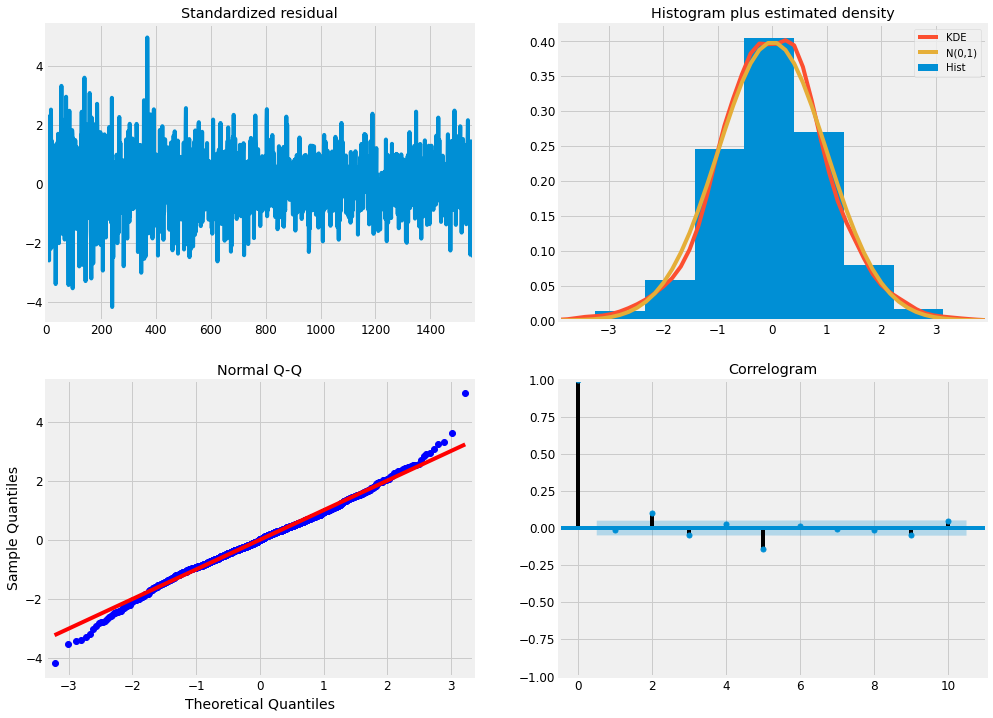

In [ ]:
sl_results.plot_diagnostics(figsize=(15,12))
plt.show()

#### Validation

In [ ]:
sl_pred = sl_results.get_prediction(start = 1440, end = 1607, dynamic=False)
sl_pred_ci = sl_pred.conf_int()
sl_pred_ci.head()

lower GMSL  upper GMSL
Time                              
2000-01-15    8.922513   17.728800
2000-02-15   10.275730   19.082016
2000-03-15   12.927067   21.733354
2000-04-15   16.700776   25.507062
2000-05-15   18.878980   27.685266

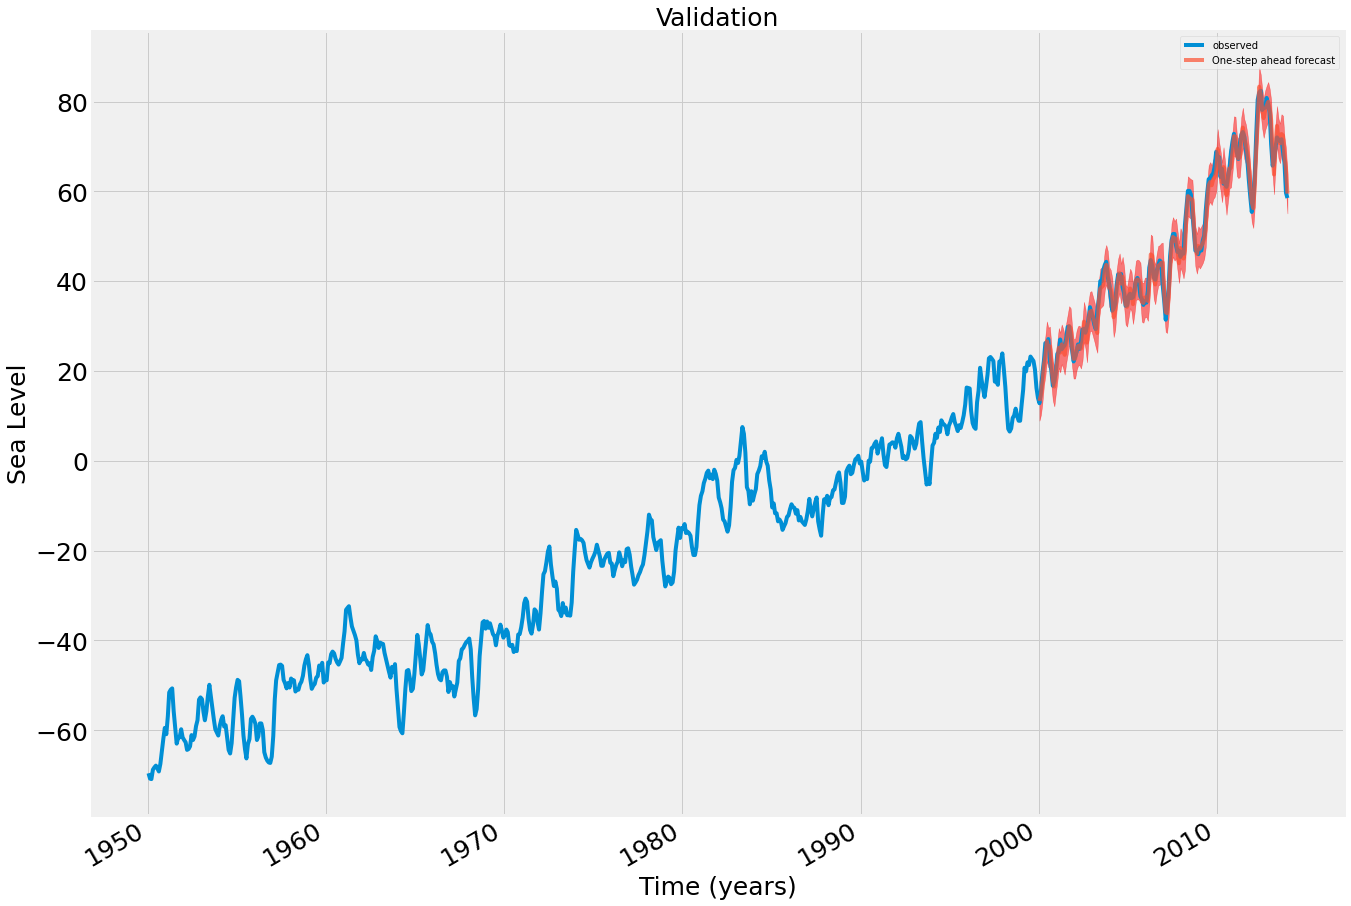

In [ ]:
ax = sea_level_df_index["GMSL"]['1950':].plot(label='observed')
sl_pred.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha=.7)

ax.fill_between(sl_pred_ci.index, sl_pred_ci.iloc[:, 0], sl_pred_ci.iloc[:, 1], color='r', alpha=.5)

ax.set_xlabel('Time (years)', fontsize = 25)
ax.set_ylabel('Sea Level', fontsize = 25)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
ax.set_title("Validation", fontsize = 25)
plt.legend()

plt.show()

In [ ]:
sl_forecast = sl_pred.predicted_mean
sl_true = sea_level_df_index["GMSL"]['2000-01-15':]

# Compute the mean square error
sl_mse = ((sl_forecast - sl_true) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(sl_mse, 2)))
print('The Root Mean Square Error (RMSE) of the forcast: {:.4f}'
      .format(np.sqrt(sum((sl_forecast-sl_true)**2)/len(sl_forecast))))

The Mean Squared Error (MSE) of the forecast is 3.81
The Root Mean Square Error (RMSE) of the forcast: 1.9523


#### Prediction

In [ ]:
from fbprophet import Prophet

ts_sea_level = sea_level_df[["Time","GMSL"]].rename(columns={'Time':'ds', 'GMSL':'y'})

ts_sea_level.columns = ['ds','y']
sl_model_pre = Prophet(yearly_seasonality=True) 
sl_model_pre.fit(ts_sea_level)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# predict for 1 year in the furure and M - month is the frequency
sl_future = sl_model_pre.make_future_dataframe(periods = 60, freq = 'M')  
# now lets make the prediction
sl_predict = sl_model_pre.predict(sl_future)
sl_predict[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

ds       yhat  yhat_lower  yhat_upper
1656 2017-12-31  81.211223   72.376906   90.661840
1657 2018-01-31  77.162013   67.846214   86.551395
1658 2018-02-28  79.545090   70.556477   88.509523
1659 2018-03-31  78.162313   69.602824   87.446175
1660 2018-04-30  77.065951   67.302329   85.552509
1661 2018-05-31  78.431658   68.828811   87.206377
1662 2018-06-30  78.890105   69.512171   87.472954
1663 2018-07-31  81.108168   72.950641   90.308094
1664 2018-08-31  84.040331   74.883067   93.521182
1665 2018-09-30  75.135682   65.761132   84.243393
1666 2018-10-31  81.503510   72.372545   90.135102
1667 2018-11-30  73.655960   63.772745   82.777063

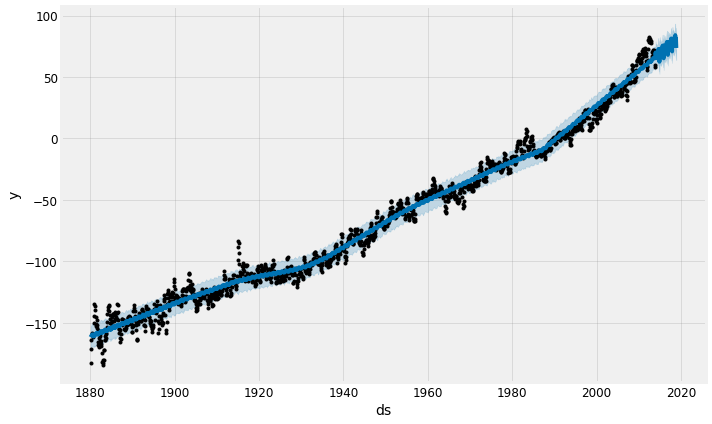

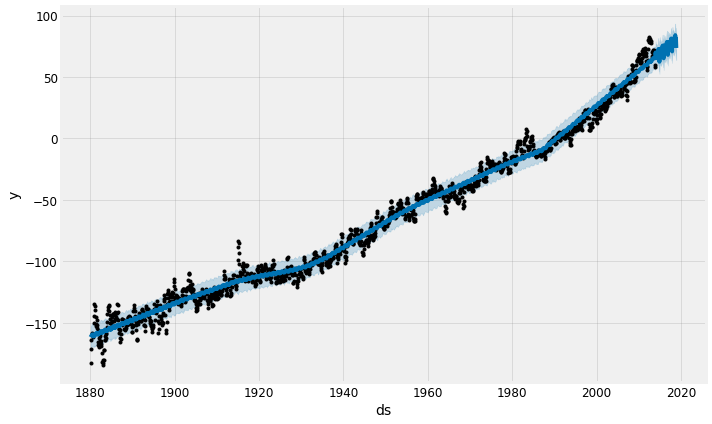

In [ ]:
sl_model_pre.plot(sl_predict)

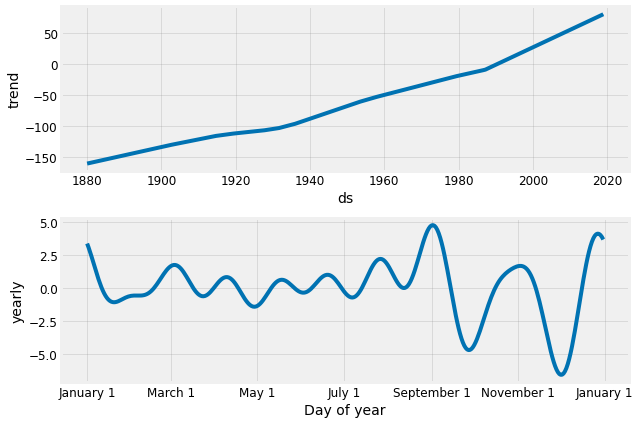

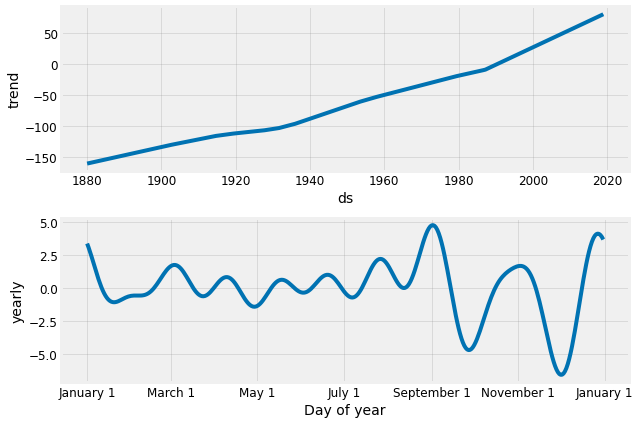

In [ ]:
sl_model_pre.plot_components(sl_predict)

## CO2 Emission Seasonal *ARIMA*

In [ ]:
mod = sm.tsa.statespace.SARIMAX(mte, order=(1,1,1), seasonal_order=(0,1,1,12), enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                          Statespace Model Results                                          
Dep. Variable:     Total Energy Electric Power Sector CO2 Emissions   No. Observations:                  523
Model:                               SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1609.807
Date:                                              Mon, 02 May 2022   AIC                           3227.614
Time:                                                      18:28:55   BIC                           3244.440
Sample:                                                  01-01-1973   HQIC                          3234.219
                                                       - 07-01-2016                                         
Covariance Type:                                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------

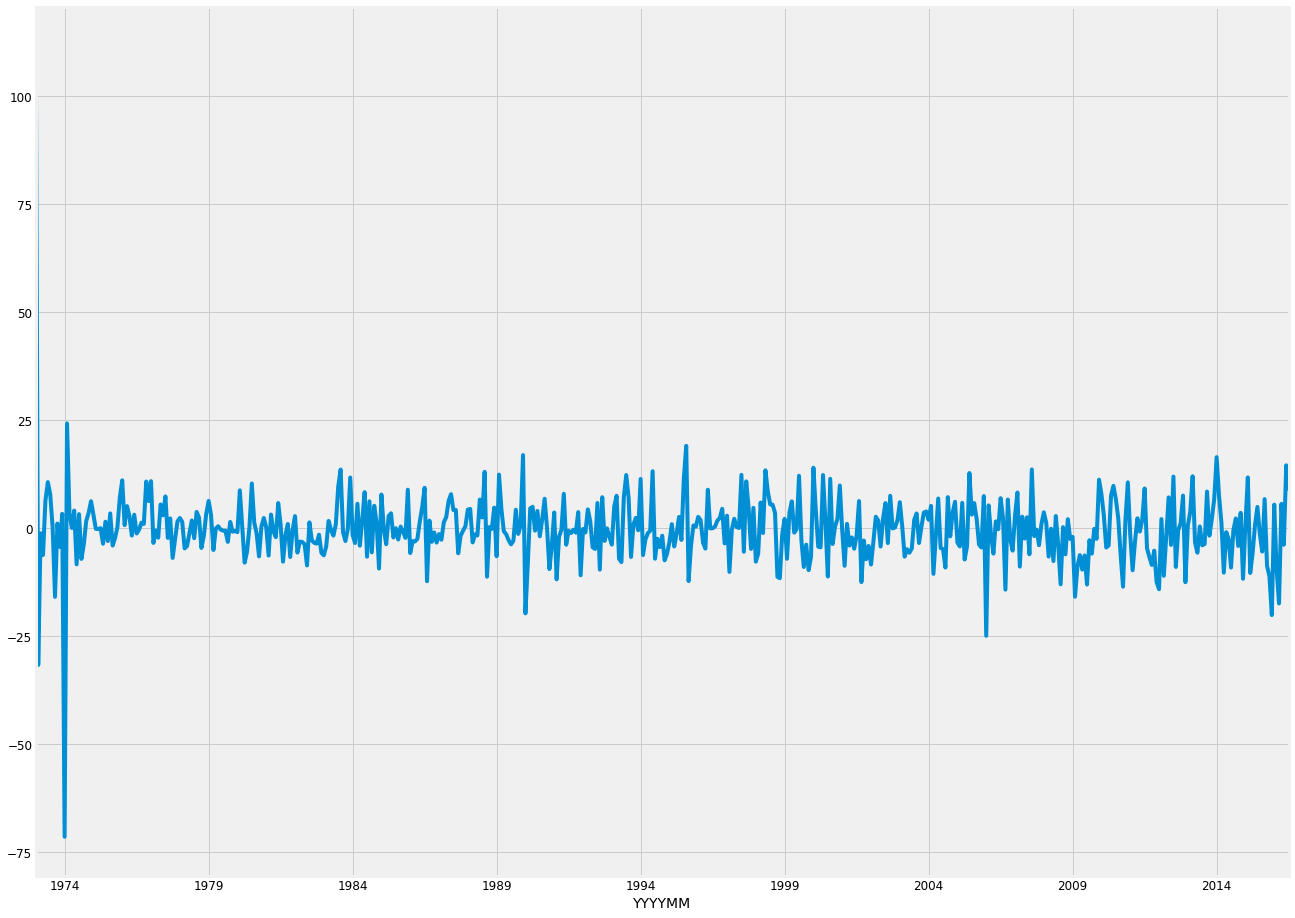

In [ ]:
results.resid.plot()

In [ ]:
print(results.resid.describe())

count    523.000000
mean      -0.162548
std        8.636572
min      -71.385458
25%       -3.948264
50%       -0.313986
75%        3.471518
max      111.621000
dtype: float64


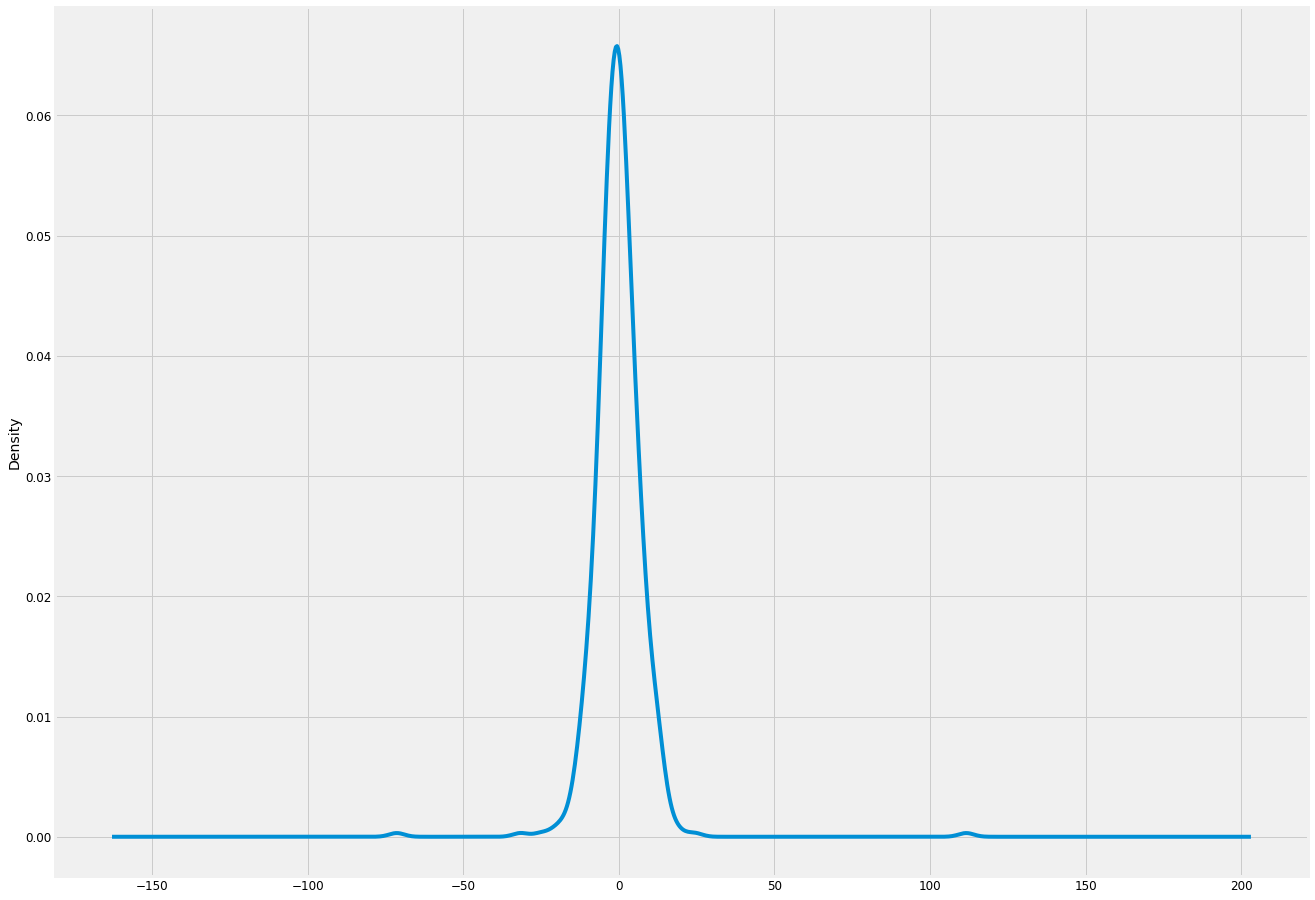

In [ ]:
results.resid.plot(kind='kde')

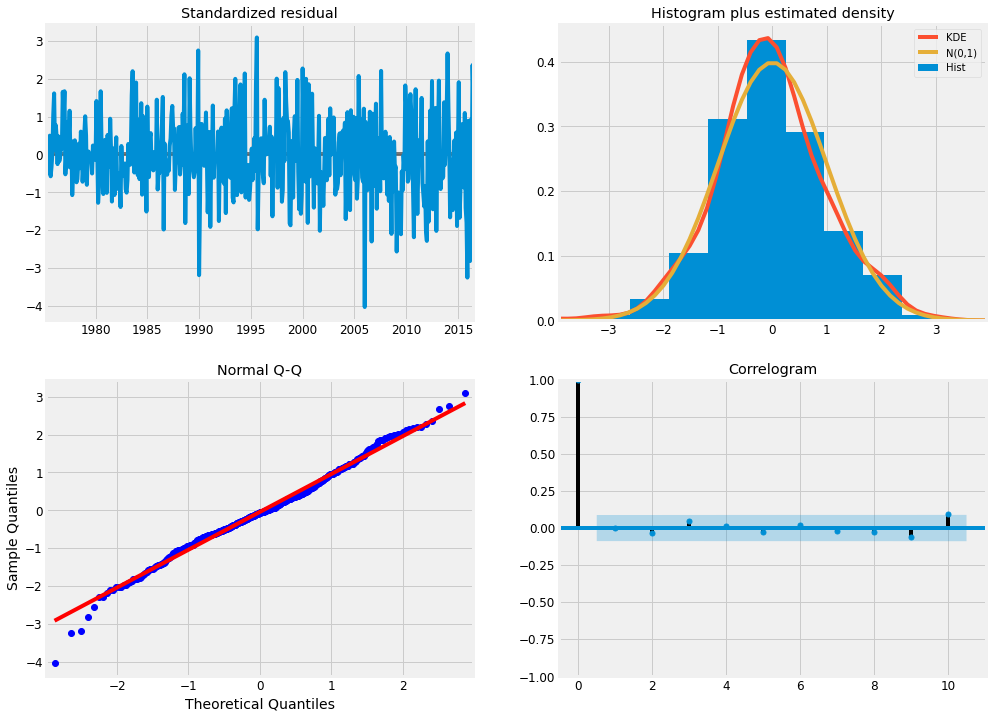

In [ ]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

### Validate Prediction

❗One Step validation 方法复制

In [ ]:
pred = results.get_prediction(start = 480, end = 523, dynamic=False)
pred_ci = pred.conf_int()
pred_ci.head()

lower Total Energy Electric Power Sector CO2 Emissions  \
2013-01-01                                         161.741248        
2013-02-01                                         140.065784        
2013-03-01                                         139.844217        
2013-04-01                                         135.304387        
2013-05-01                                         147.855272        

            upper Total Energy Electric Power Sector CO2 Emissions  
2013-01-01                                         185.947913       
2013-02-01                                         164.272449       
2013-03-01                                         164.050882       
2013-04-01                                         159.511052       
2013-05-01                                         172.061937

❗One Step validation 方法复制

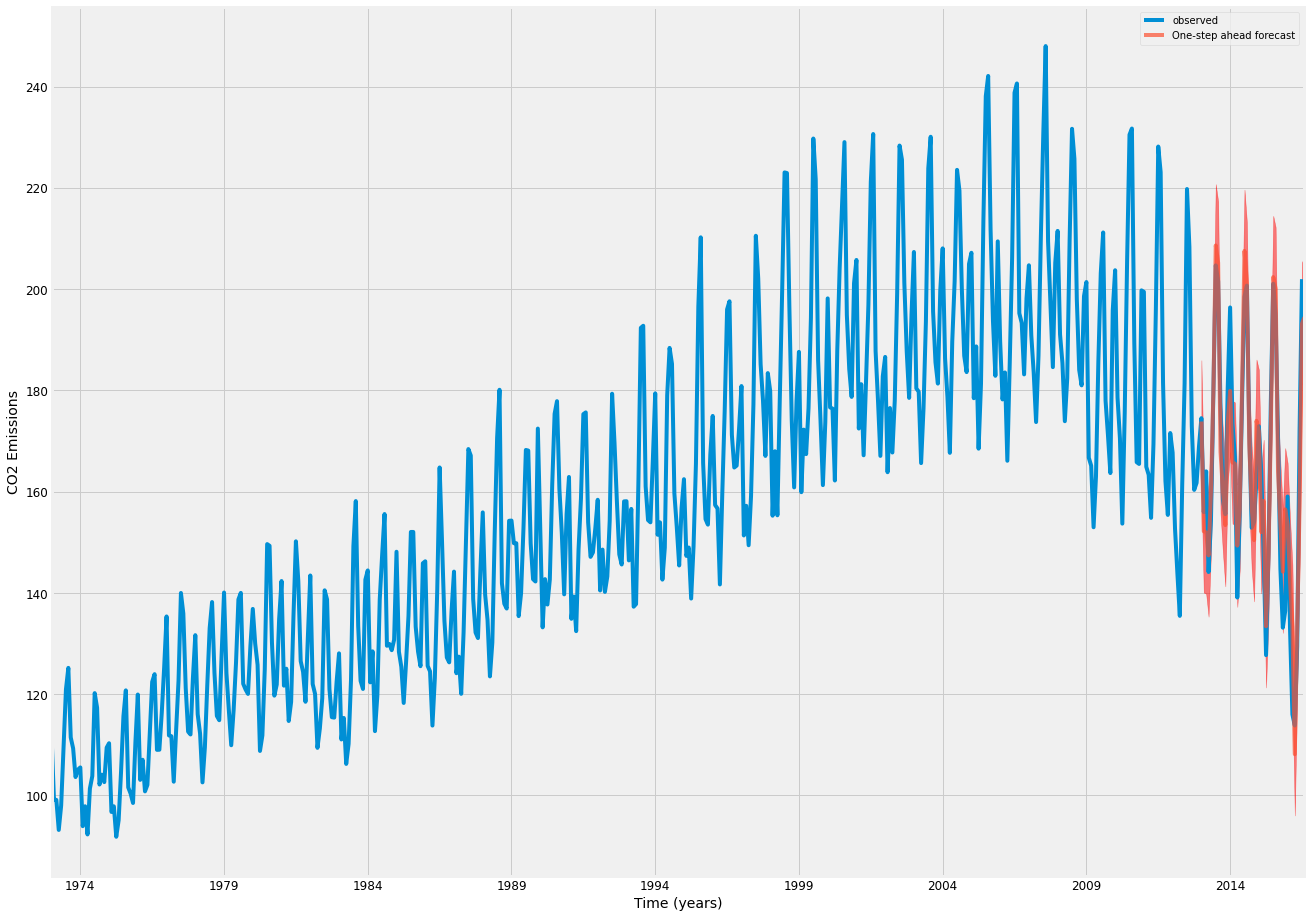

In [ ]:
ax = mte['1973':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha=.7)

ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='r', alpha=.5)

ax.set_xlabel('Time (years)')
ax.set_ylabel('CO2 Emissions')
plt.legend()

plt.show()

❗One Step validation 方法复制

In [ ]:
mte_forecast = pred.predicted_mean
mte_truth = mte['2013-02-01':]

# Compute the mean square error
mse = ((mte_forecast - mte_truth) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forcast: {:.4f}'
      .format(np.sqrt(sum((mte_forecast-mte_truth)**2)/len(mte_forecast))))

The Mean Squared Error (MSE) of the forecast is 66.53
The Root Mean Square Error (RMSE) of the forcast: nan


In [ ]:
mte_pred_concat = pd.concat([mte_truth, mte_forecast])

In [ ]:
mte_pred_concat

2013-02-01    155.955000
2013-03-01    163.999000
2013-04-01    144.127000
2013-05-01    154.325000
2013-06-01    179.919000
                 ...    
2016-04-01    108.140848
2016-05-01    133.230219
2016-06-01    157.486662
2016-07-01    193.153590
2016-08-01    194.418104
Length: 86, dtype: float64

In [ ]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2013-02-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

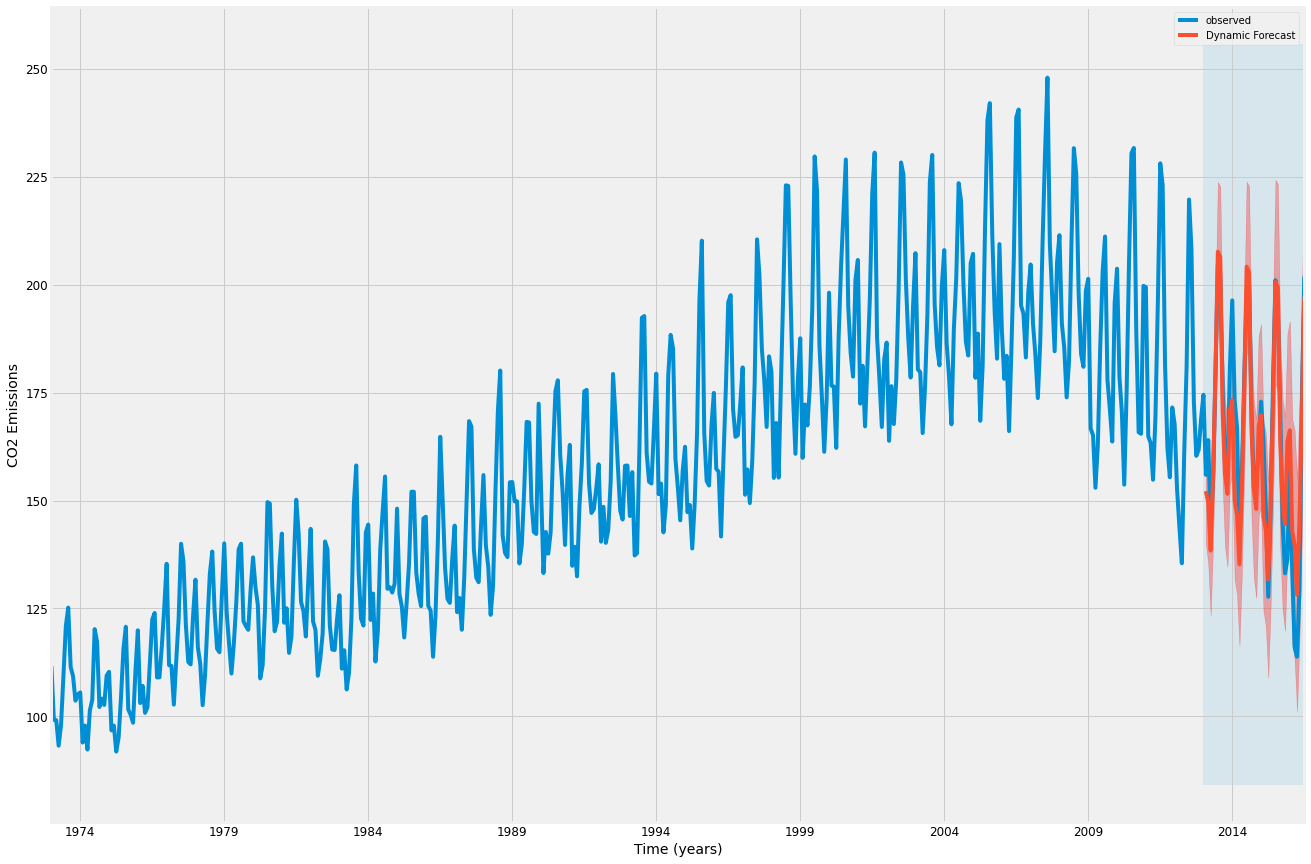

In [ ]:
# DELETE
ax = mte['1973':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], 
                color='r', 
                alpha=.3)

ax.fill_betweenx(ax.get_ylim(), 
                 pd.to_datetime('2013-01-31'), 
                 mte.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Time (years)')
ax.set_ylabel('CO2 Emissions')

plt.legend()
plt.show()

In [ ]:
# Extract the predicted and true values of our time series
mte_forecast = pred_dynamic.predicted_mean
mte_orginal = mte['2013-02-01':]

# Compute the mean square error
mse = ((mte_forecast - mte_orginal) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forcast: {:.4f}'
      .format(np.sqrt(sum((mte_forecast-mte_orginal)**2)/len(mte_forecast))))

The Mean Squared Error (MSE) of the forecast is 110.37
The Root Mean Square Error (RMSE) of the forcast: 10.5055


### Forecasting

In [ ]:
# Get forecast of 10 years or 120 months steps ahead in future
forecast = results.get_forecast(steps= 120)
# Get confidence intervals of forecasts
forecast_ci = forecast.conf_int()
forecast_ci.head()

lower Total Energy Electric Power Sector CO2 Emissions  \
2016-08-01                                         182.314772        
2016-09-01                                         146.551059        
2016-10-01                                         126.140163        
2016-11-01                                         120.035356        
2016-12-01                                         133.983022        

            upper Total Energy Electric Power Sector CO2 Emissions  
2016-08-01                                         206.521437       
2016-09-01                                         174.985779       
2016-10-01                                         156.325595       
2016-11-01                                         151.178017       
2016-12-01                                         165.774341

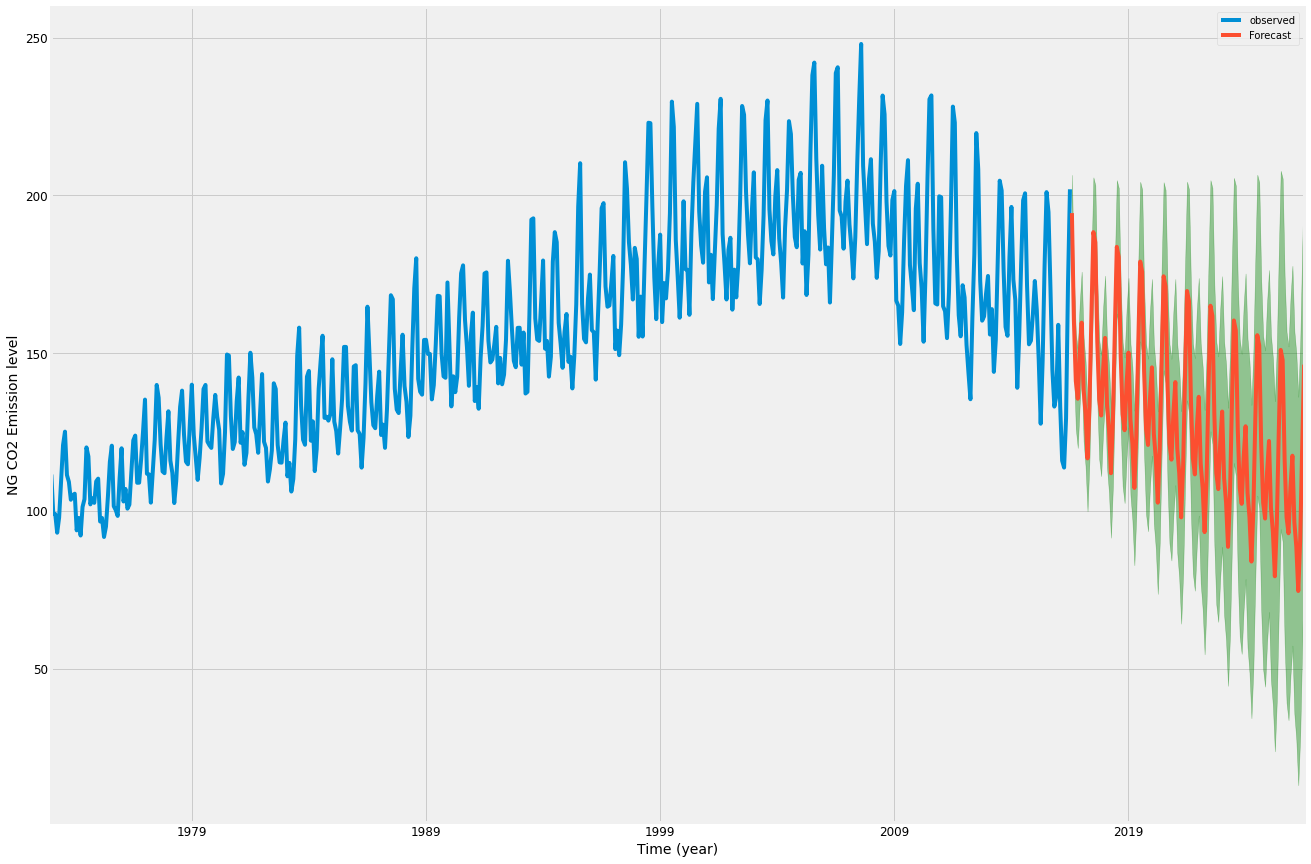

In [ ]:
ax = mte.plot(label='observed', figsize=(20, 15))
forecast.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='g', alpha=.4)
ax.set_xlabel('Time (year)')
ax.set_ylabel('NG CO2 Emission level')

plt.legend()
plt.show()

## Temperature Modeling

# Conclusion/Summary of Findings

The project above shows strong evidence of the topic of Global Warming. It is an inevitable and serious topic that all humanbeings have to face. We used statistical methods to show a strong evidence that there is a correlation between the raise of temperature, the raise of CO2 emission, and the raise of the sea level. Although we haven't show a cause and effect relationship yet, but we may assume that it is the raise of CO2 emission lead to a grow of temperature, which furtherly increase the speed of the melting of glaciers, and eventually lead to the raise of sea level. We also made a simple prediction of future temperature index, which shows a rising trend. Hence, a prompt work should be done, by all of us colaboratively, to avoid the worst things happen.

# Challenges/ Obstacles Faced

Using SARIMA for a "curved" dataset like CO2 Emission clearly generates a prediction that lacks accuracy. It can successfully deal with the seasonality our original dataset has; however, since in around 2010-2015 there was s obvious change of the curve, using an ARIMA model gives us a rather high mse for the fit. Further investigation on modelling needed to be performed in order to improve the accuracy of the forcast for this kind of data.

# Potential Next Steps/ Future Direction

Some potential next steps or future directions would to include advance topics covered in lecture into the notebook. Some of the advance topics would be neural networks. There are tons of satellite imaging of the earth and we could use those to develop further anaylsis and modeling of global warming. Google earth has tons of images of the earth. 